Player number recognition has been done before on NFL players, and also on football (soccer) players, but there is no public dataset for football player kit numbers so I have created my own consisting of player numbers 1 - 11, with 10 occurences of each number. I selected data with no occlusion of the kit number, so the numbers are clearly visible and in full. Players are usually singled out and in focus of the camera, with only a minority of the data having multiple players in the shot, but there is always only one players number visible. Collecting the data manually was time consuming, but neccessary for the highest quality data, and having collected it manually it should result in no unusuable data. I only collected data for kit numbers 1 to 11 since these are the most common numbers in football due to it being a numbering system for the starting eleven players. Past the number 11 the kit numbers become less and less common. I did originally collect 1 of every number from 1 to 99, but for certain numbers I was unable to find any real life photos for, since not all leagues allow numbers all the way to 99, and when they do, players tend not to choose such a high number. This lead to me using the Nike.com kit customiser to put custom numbers on a base kit and screen grabbing the accomponying image. This data seemed useless since there were no real life examples anyway, so test data would also not be these numbers. I contemplated mixing NFL kit numbers into the data too since the number fonts are often very similar, and numbers are indeed numbers, but I wanted the data to be unique to soccer football.

In [1]:
import sys
assert sys.version_info >= (3, 5) #Python 3.5

In [2]:
import sklearn
assert sklearn.__version__ >= "0.20" #Scikit-learn 0.20

In [3]:
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import cv2 as cv

In [4]:
#For Plotting:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from PIL import Image

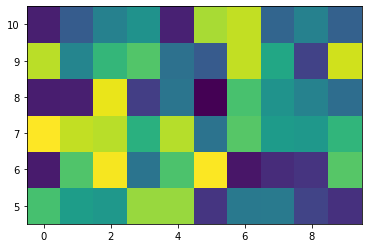

In [5]:
np.random.seed(2368980)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1) #len = 11
y = np.arange(4.5, 11, 1) #len = 7

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z)

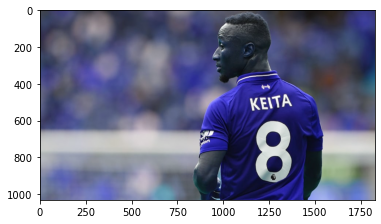

In [6]:
img = cv.imread(r"C:\Users\ryand\Desktop\Data Mining & ML\OneToEleven\Eight\076.jpg")

res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

plt.imshow(res) #imshow displays data as an image, renders as a pseudocolor image, so the red has become blue

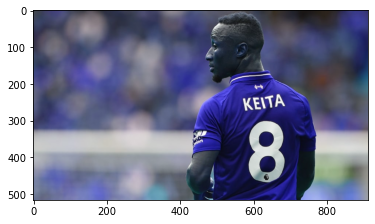

In [7]:
plt.imshow(img)

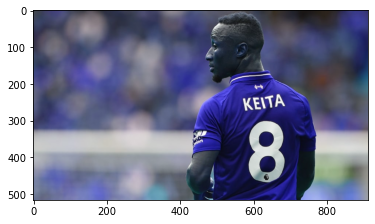

In [8]:
plt.imshow(img, cmap="gray", vmin=0, vmax=255) #doesn't work because the image shape is (Y Pixels, X Pixels, CHANNEL 3) which
                                               #is RBG, RGBA is 4 channel

In [9]:
img.shape

(516, 912, 3)

# Scaling and Greyscaling

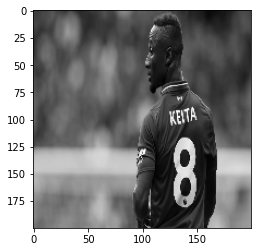

In [10]:
#Put the image in an array and use cv.IMREAD_GRAYSCALE in combination with colour mapping = grey

image_array = cv.imread(r"C:\Users\ryand\Desktop\Data Mining & ML\OneToEleven\Eight\076.jpg", cv.IMREAD_GRAYSCALE)
image_array = cv.resize(image_array, (200, 200)) #resizes the image to 200 by 200 pixels
plt.imshow(image_array, cmap="gray")

In [11]:
image_array.shape #Image shape now reflects a greyscaled image

(200, 200)

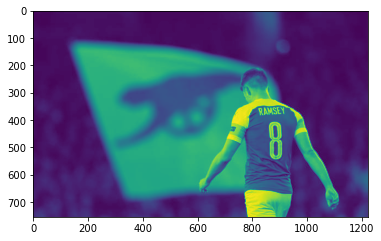

In [12]:
img2 = cv.imread(r"C:\Users\ryand\Desktop\Data Mining & ML\OneToEleven\Eight\080.jpg", cv.IMREAD_GRAYSCALE)

res2 = cv.resize(img2,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

plt.imshow(res2)

In [13]:
res2.shape

(754, 1224)

In [14]:
img2.shape

(377, 612)

# Cropping

-1

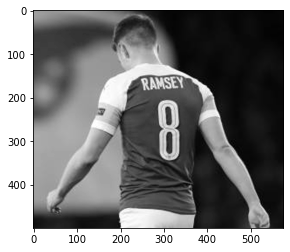

In [15]:
cropped_img = res2[200:700, 575:1150] # keep everything between 200 and 700 on the Y-Axis AND 
                                      # everything between 575 and 1150 on the X-Axis
plt.imshow(cropped_img, cmap="gray")
cv.imwrite("Cropped Image.jpg", cropped_img)
cv.waitKey(0)

# ROTATION

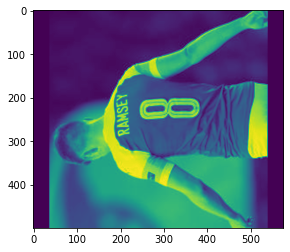

In [16]:
rows,cols = cropped_img.shape #Has to be in greyscale because only rows, cols, would be rows,cols,ch for channels RGB & RGBA

M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(cropped_img,M,(cols,rows))

plt.imshow(dst)

# Affine Transformation

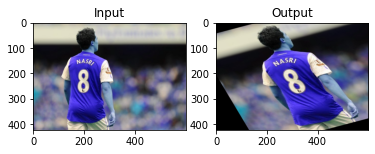

In [17]:
img_coloured = cv.imread(r"C:\Users\ryand\Desktop\Data Mining & ML\OneToEleven\Eight\075.jpg")
rows2,cols2,ch = img_coloured.shape

pts1 = np.float32([[50,50],[200,50],[50,200]]) #get orginial positions
pts2 = np.float32([[10,100],[200,50],[100,250]]) #move them to these positions

M2 = cv.getAffineTransform(pts1,pts2)
dst2 = cv.warpAffine(img_coloured,M2,(cols2,rows2))

plt.subplot(121),plt.imshow(img_coloured),plt.title('Input')
plt.subplot(122),plt.imshow(dst2),plt.title('Output')
plt.show()

# Perspective Transformation REQUIRES LOOKOVER

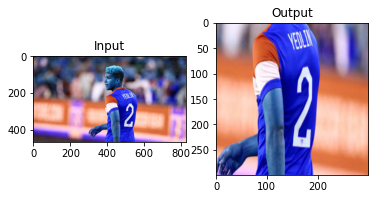

In [18]:
og_img = cv.imread(r"C:\Users\ryand\Desktop\Data Mining & ML\OneToEleven\Two\019.jpg")
rows3,cols3,ch3 = og_img.shape

ptsOne = np.float32([[300,200],[700,175],[300,425],[700,425]])
ptsTwo = np.float32([[0,0],[300,0],[0,300],[300,300]])

M3 = cv.getPerspectiveTransform(ptsOne, ptsTwo)

dst3 = cv.warpPerspective(og_img,M3,(300,300))

plt.subplot(121),plt.imshow(og_img),plt.title('Input')
plt.subplot(122),plt.imshow(dst3),plt.title('Output')
plt.show()

# Changing Colour Spaces NEED ASSISTANCE WITH SINGLING OUT WHITE

In [19]:
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

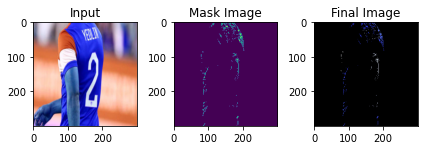

In [20]:
og_img = cv.imread(r"C:\Users\ryand\Desktop\Data Mining & ML\OneToEleven\Two\019.jpg")

hsv = cv.cvtColor(dst3, cv.COLOR_BGR2HSV) #Converts BGR to HSV

#Define range of blue color in hsv
lower_blue = np.array([0,0,255])
upper_blue = np.array([50,255,255])

mask = cv.inRange(hsv, lower_blue, upper_blue) #Thresholds the hsv image to get only blue colours

resres = cv.bitwise_and(dst3,dst3, mask = mask) #Bitwise-AND mask and original image

plt.subplot(2,3,1),plt.imshow(dst3),plt.title('Input')
plt.subplot(2,3,2),plt.imshow(mask),plt.title('Mask Image')
plt.subplot(2,3,3),plt.imshow(resres),plt.title('Final Image')
plt.tight_layout() #Spaces out the plots a little bit

plt.show()

Transformations

Scaling
The only transformation I have made is to the size of the images, and I have decided to make them all 28 x 28 pixels. Originally the images were of all sizes but this makes them all the same size. I was contemplating cropping the images, but that would be time-costly and not neccessary.

Zoom
None.

Translation
None.

Rotation
None.

Affline Transformation
None.

Perspective Transformation
None.

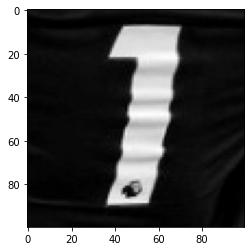

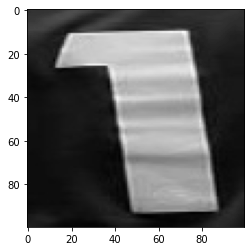

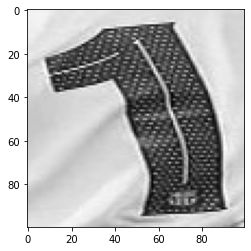

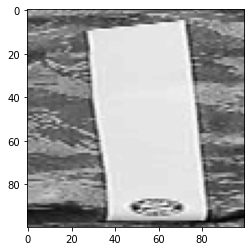

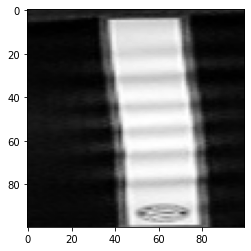

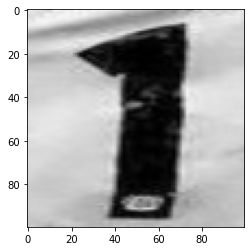

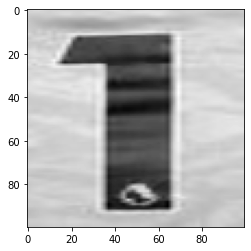

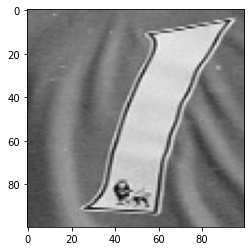

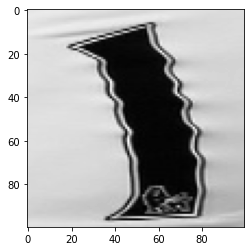

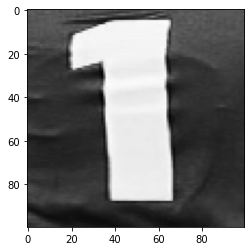

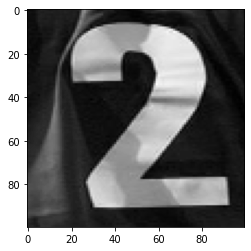

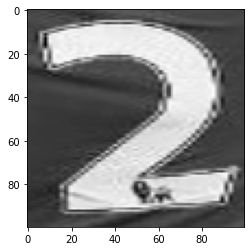

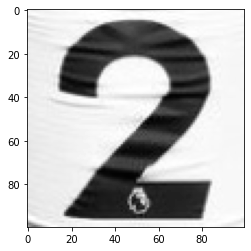

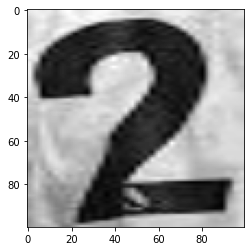

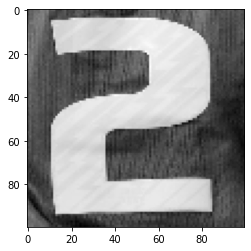

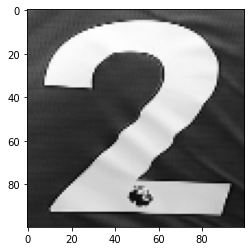

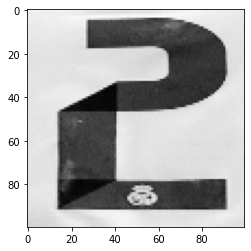

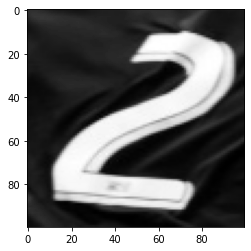

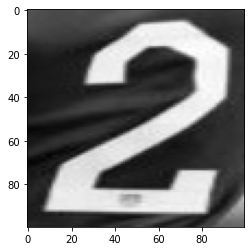

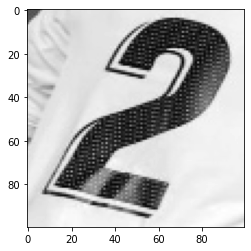

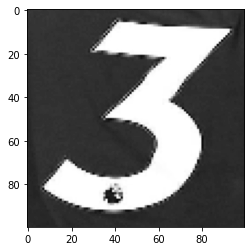

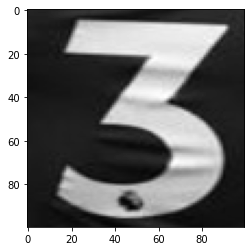

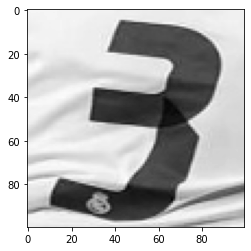

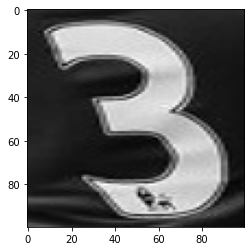

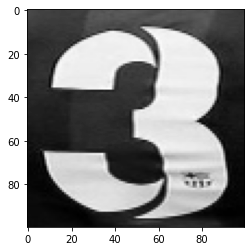

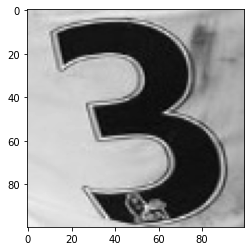

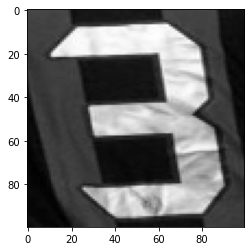

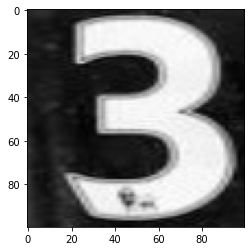

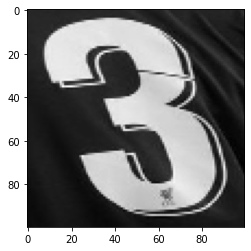

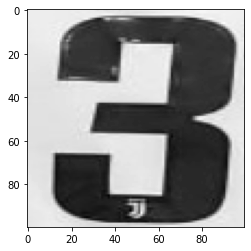

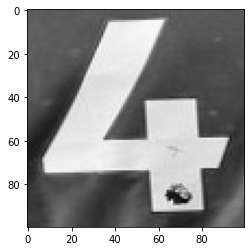

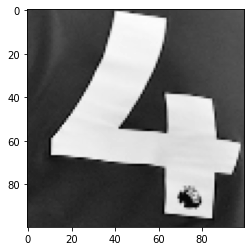

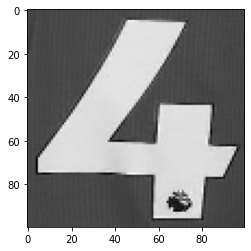

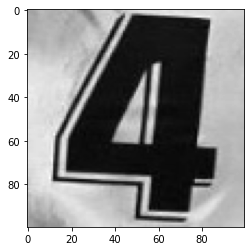

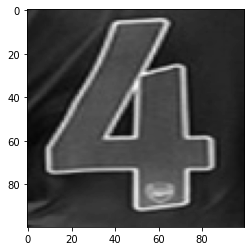

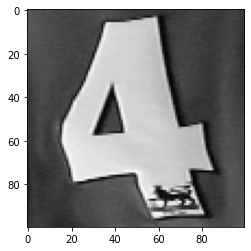

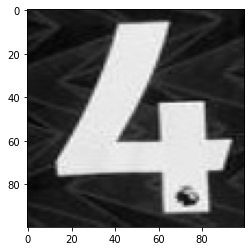

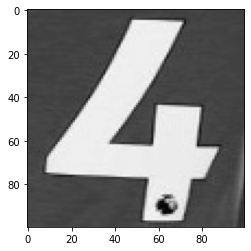

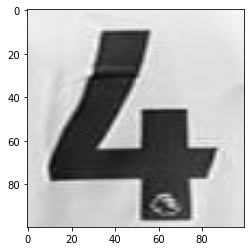

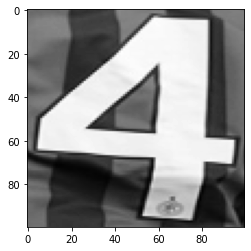

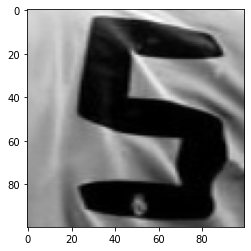

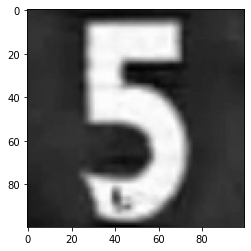

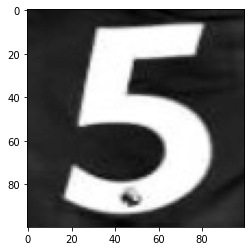

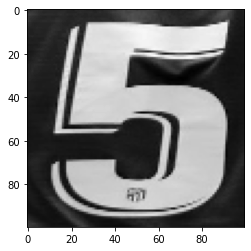

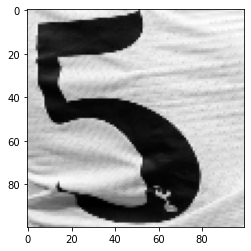

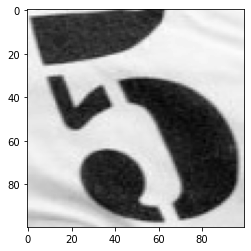

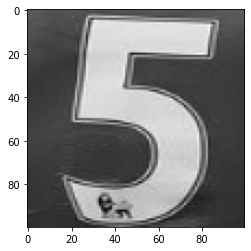

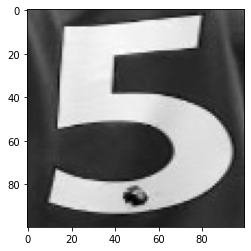

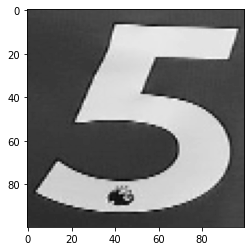

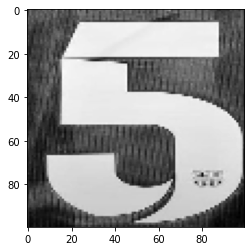

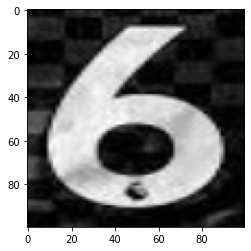

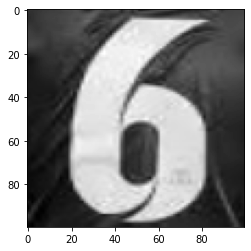

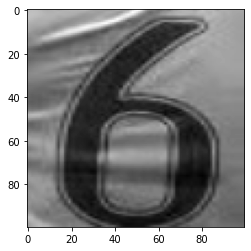

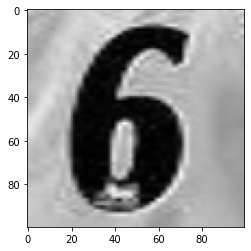

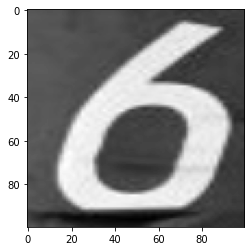

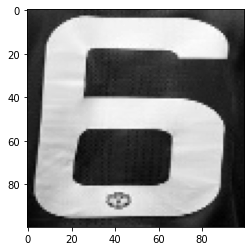

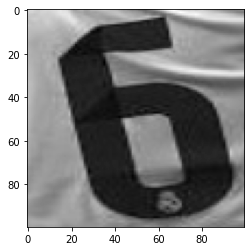

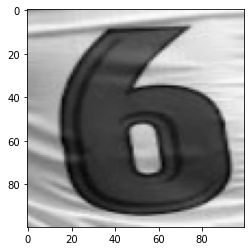

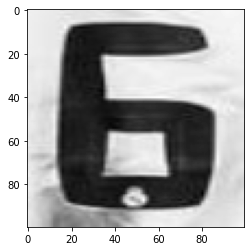

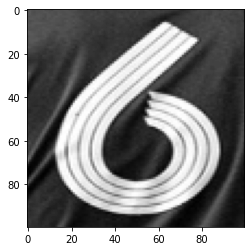

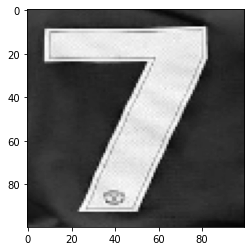

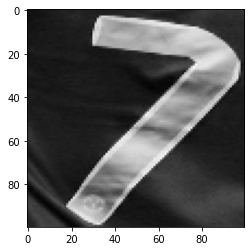

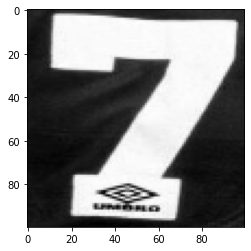

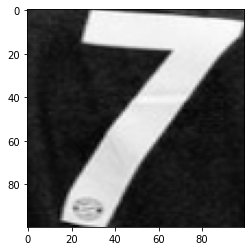

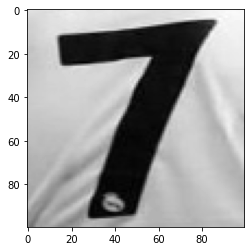

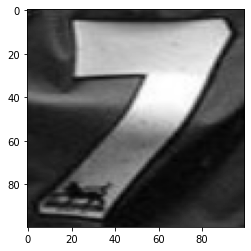

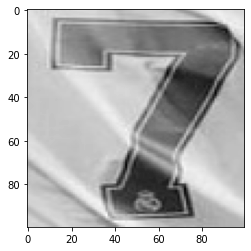

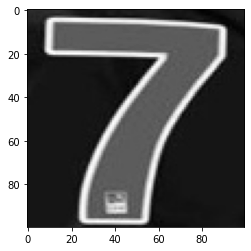

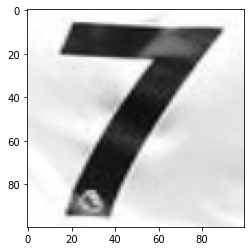

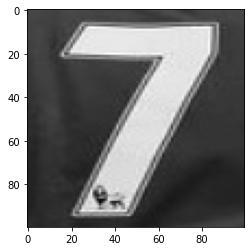

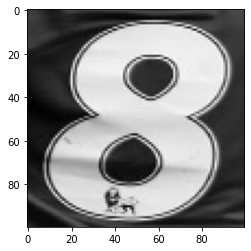

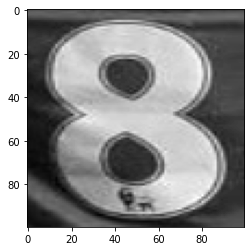

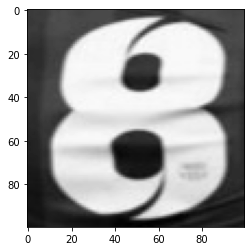

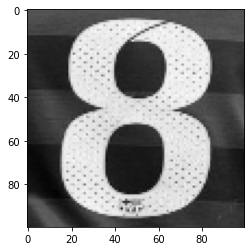

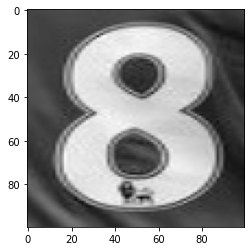

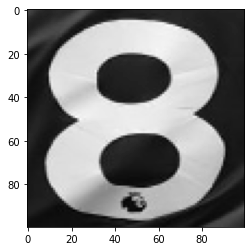

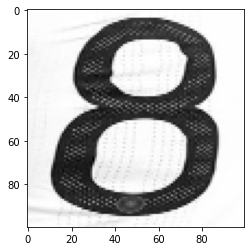

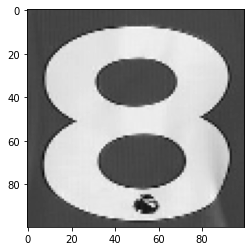

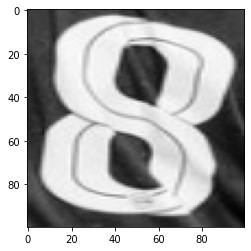

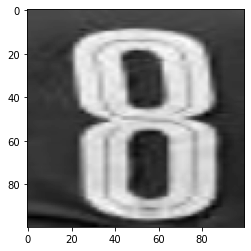

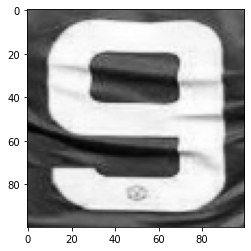

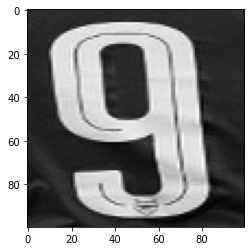

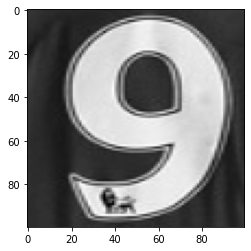

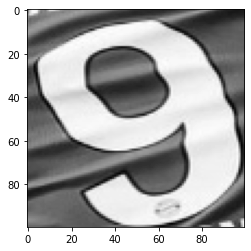

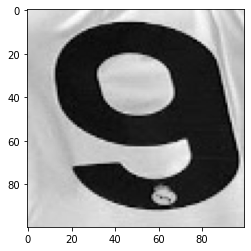

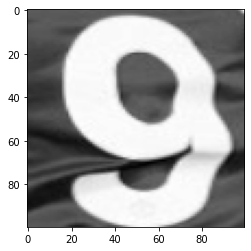

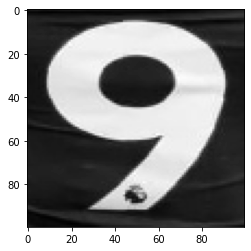

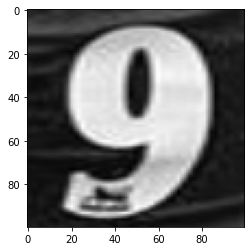

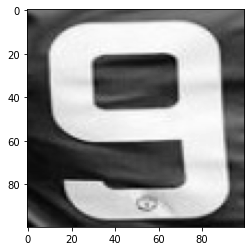

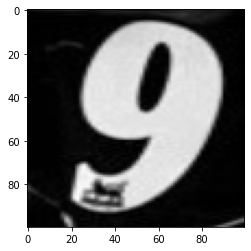

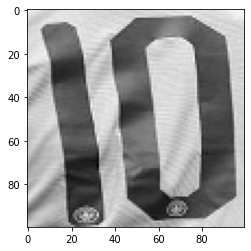

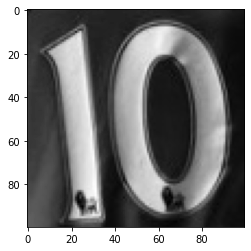

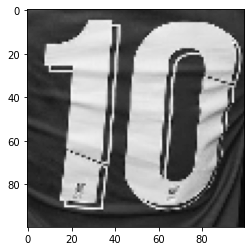

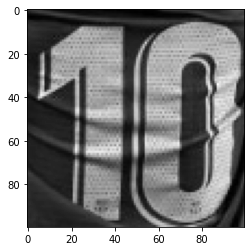

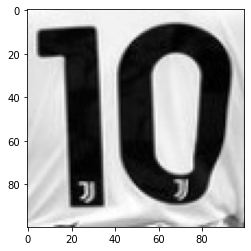

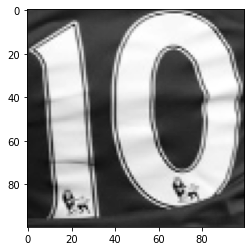

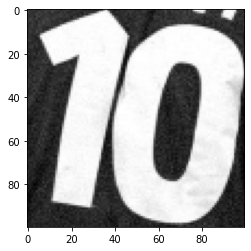

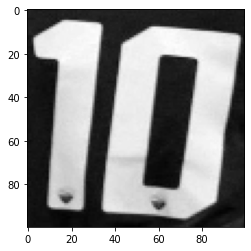

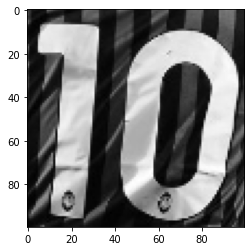

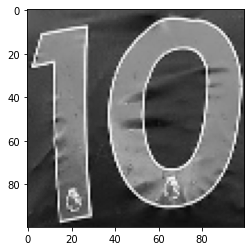

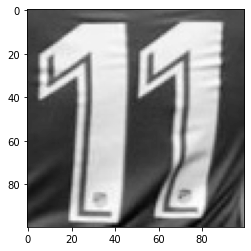

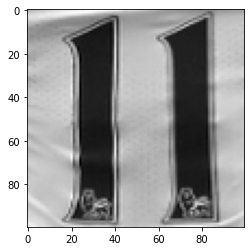

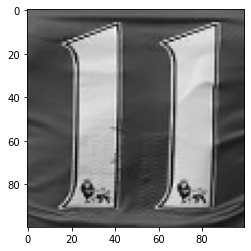

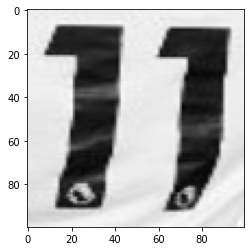

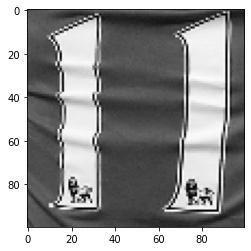

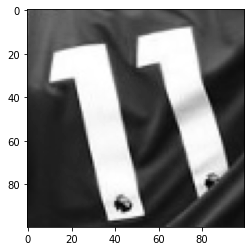

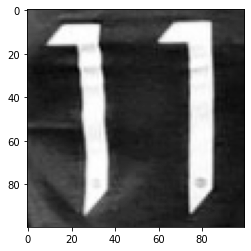

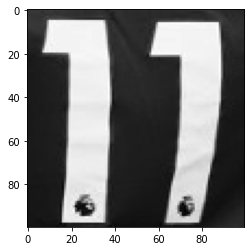

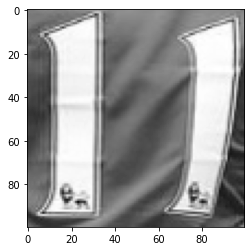

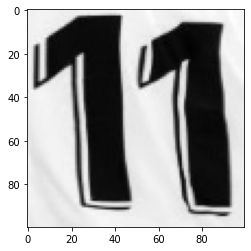

In [21]:
DATADIR = r"C:\Users\ryand\Desktop\Data Mining & ML\CroppedOneToEleven" #r for rawstring
CATEGORIES = ["One","Two","Three","Four","Five","Six","Seven","Eight","Nine","Ten","Eleven"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv.imread(os.path.join(path,img), cv.IMREAD_GRAYSCALE) #Grayscaling reduces the file size
        img_array = cv.resize(img_array, (100, 100))
        
        plt.imshow(img_array, cmap="gray")
        plt.show()

In [22]:
print(img_array)

[[214 214 214 ... 220 220 220]
 [213 213 213 ... 219 219 219]
 [212 212 213 ... 219 219 219]
 ...
 [216 207 206 ... 210 210 211]
 [217 208 206 ... 210 211 211]
 [218 209 207 ... 211 211 211]]


In [23]:
print(img_array.shape)

(100, 100)


In [24]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            new_array = cv.imread(os.path.join(path,img), cv.IMREAD_GRAYSCALE) #Grayscaling reduces the file size
            new_array = cv.resize(new_array, (300,300)) #(IMG_SIZE x IMG_SIZE) applied to each image in the array
            training_data.append([new_array, class_num])
            
create_training_data()

In [25]:
print(len(training_data))

110


In [26]:
print(training_data)

[[array([[23, 23, 21, ..., 13, 14, 14],
       [23, 23, 21, ..., 14, 14, 14],
       [22, 22, 22, ..., 16, 16, 16],
       ...,
       [ 8,  8,  8, ..., 21, 19, 19],
       [ 8,  8,  8, ..., 21, 19, 19],
       [ 8,  8,  8, ..., 21, 19, 19]], dtype=uint8), 0], [array([[47, 47, 47, ..., 44, 44, 44],
       [46, 46, 46, ..., 44, 44, 44],
       [46, 46, 46, ..., 44, 44, 44],
       ...,
       [29, 29, 29, ..., 19, 19, 19],
       [29, 29, 29, ..., 19, 19, 19],
       [30, 30, 30, ..., 19, 19, 19]], dtype=uint8), 0], [array([[234, 234, 234, ..., 214, 214, 214],
       [234, 234, 234, ..., 213, 213, 213],
       [234, 234, 234, ..., 212, 212, 212],
       ...,
       [224, 224, 224, ..., 228, 230, 230],
       [223, 223, 224, ..., 217, 218, 218],
       [223, 223, 223, ..., 207, 208, 208]], dtype=uint8), 0], [array([[166, 167, 167, ...,  85,  88,  90],
       [164, 163, 163, ...,  78,  80,  82],
       [152, 151, 148, ...,  79,  75,  72],
       ...,
       [100, 101, 101, ..., 122, 120, 

In [27]:
import random

random.shuffle(training_data)

In [28]:
import gzip
train_images = gzip.open(r"C:\Users\ryand\Desktop\Data Mining & ML\HandWritten\train-images-idx3-ubyte.gz","r")
train_labels = gzip.open(r"C:\Users\ryand\Desktop\Data Mining & ML\HandWritten\train-labels-idx1-ubyte.gz","r")

image_size = 28
num_images = 60000 #There is 60,000 images in the images dataset
num_labels = 60008 #There is 60,000 images in the images dataset

import numpy as np
train_images.read(16)
buf = train_images.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size,image_size,1) #had to reshape images to make it a 2D array image_size*image_size

buf_labels = train_labels.read(image_size * image_size * num_labels)
data_labels = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.float32)
data_labels = data_labels.reshape(num_labels)

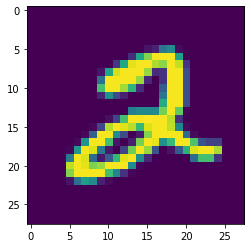

In [29]:
#need data = data.reshape(num_images, image_size, 28, 1) in cell above to print images
import matplotlib.pyplot as plt
image = np.asarray(data[5]).squeeze()
plt.imshow(image)
plt.show()

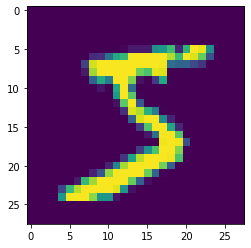

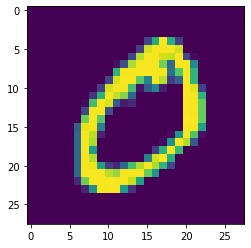

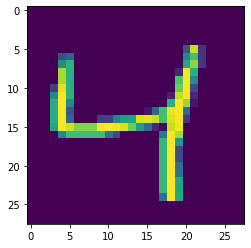

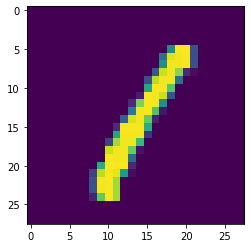

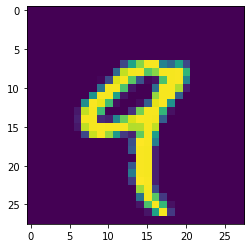

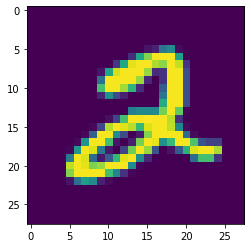

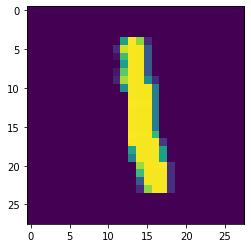

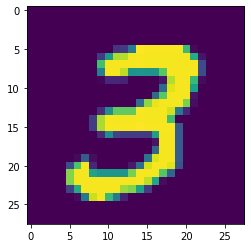

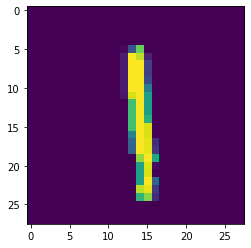

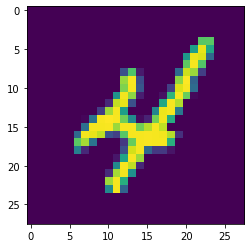

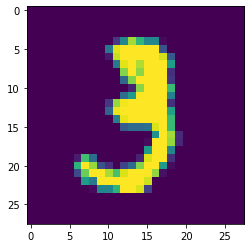

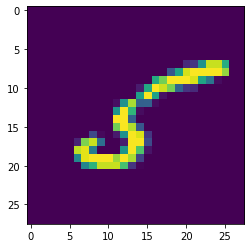

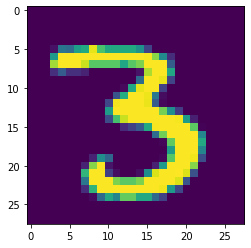

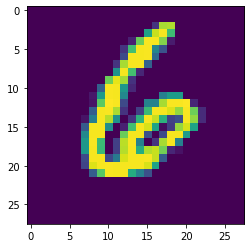

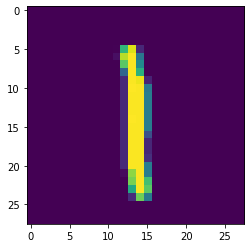

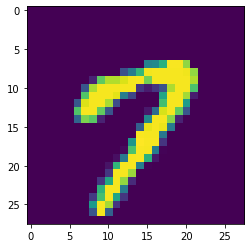

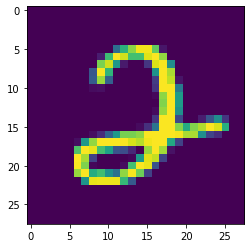

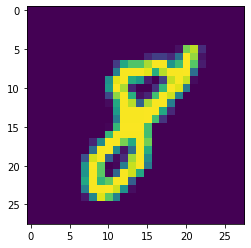

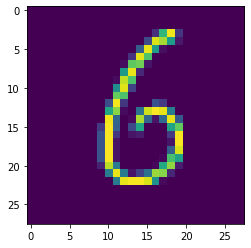

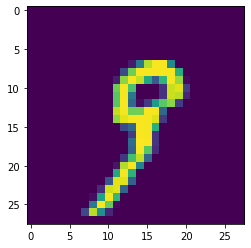

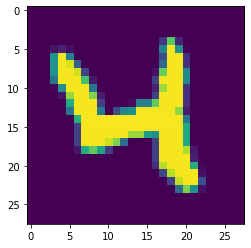

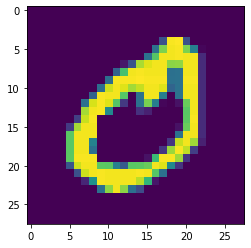

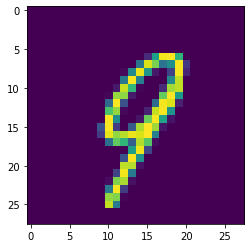

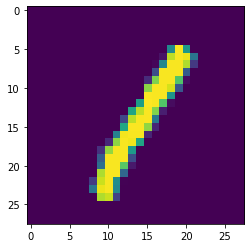

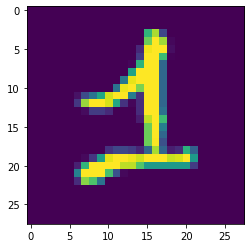

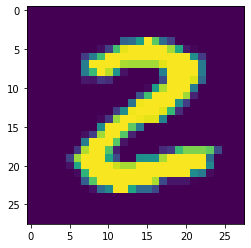

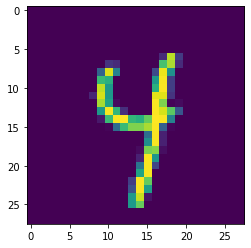

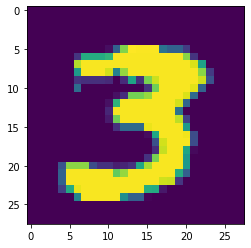

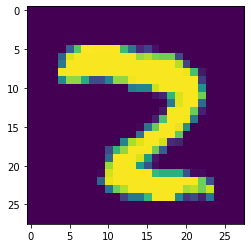

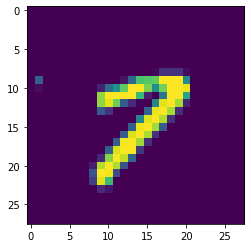

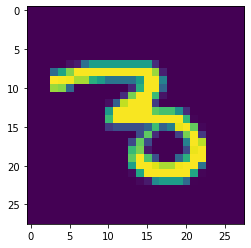

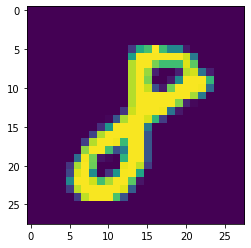

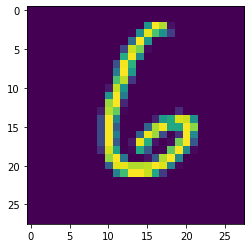

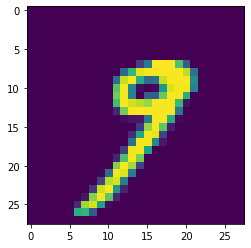

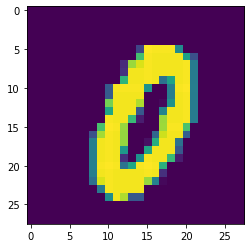

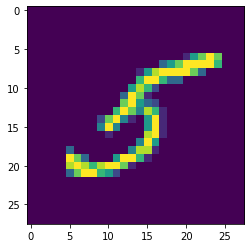

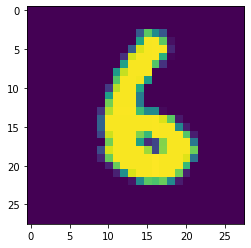

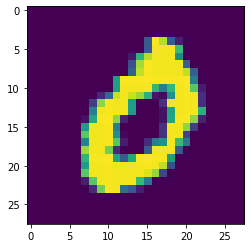

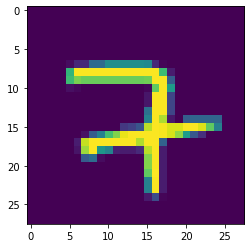

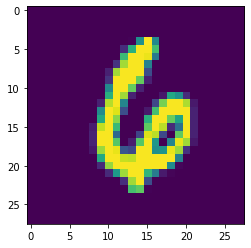

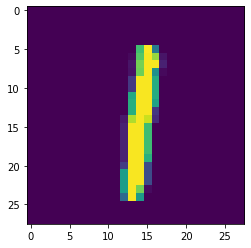

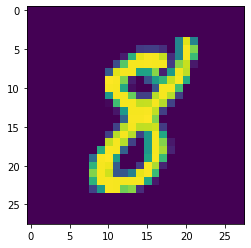

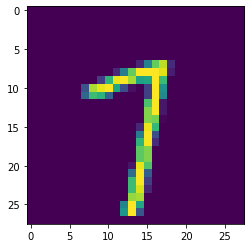

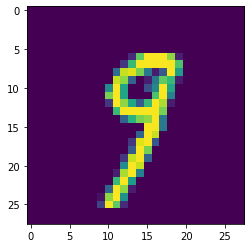

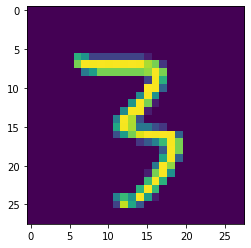

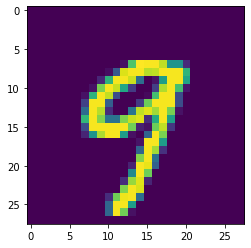

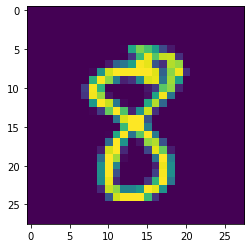

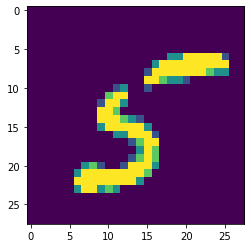

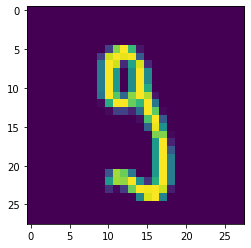

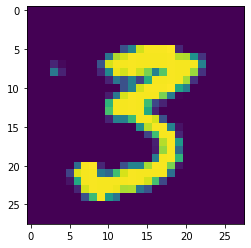

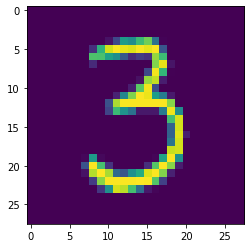

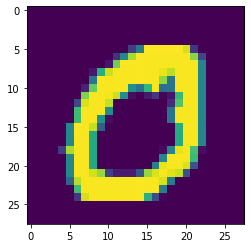

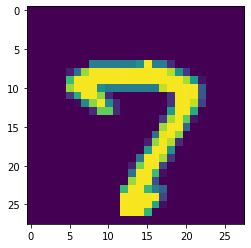

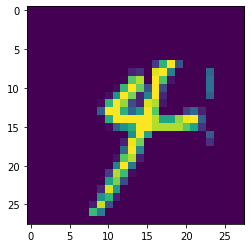

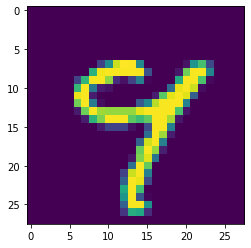

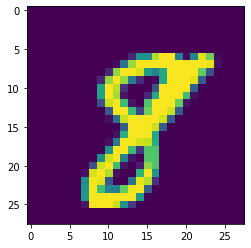

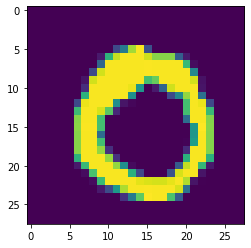

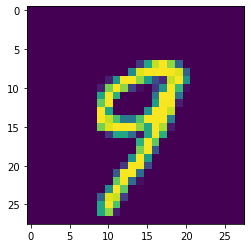

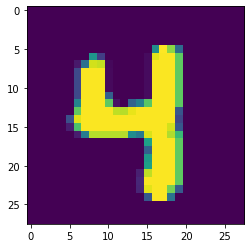

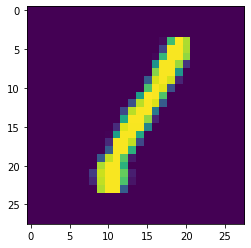

In [30]:
for x in range(60):
    image = np.asarray(data[x]).squeeze()
    plt.imshow(image)
    plt.show()

In [31]:
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
from numpy import genfromtxt

trainimg = pd.read_csv(r'C:\Users\ryand\Desktop\Data Mining & ML\Fashion\fashion-mnist_train.csv')
testimg = pd.read_csv(r'C:\Users\ryand\Desktop\Data Mining & ML\Fashion\fashion-mnist_test.csv')

trainimg

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0        30        43   
3           0  ...         3         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
59995       0  ...         0         0         0         0         0   
59996       0  ...        73         0         0         0         0   
59997       0  ...       160       162       163       135        94   
59998       0  ...         0         0         0         0         0   
59999       0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             1         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
59995         0         0         0         0         0  
59996         0         0         0         0         0  
59997         0         0         0         0         0  
59998         0         0         0         0         0  
59999         0         0         0         0         0  

[60000 rows x 785 columns]

In [32]:
trainimg.shape

(60000, 785)

array([[<AxesSubplot:xlabel='pixel747', ylabel='pixel747'>,
        <AxesSubplot:xlabel='pixel774', ylabel='pixel747'>,
        <AxesSubplot:xlabel='pixel776', ylabel='pixel747'>,
        <AxesSubplot:xlabel='pixel767', ylabel='pixel747'>],
       [<AxesSubplot:xlabel='pixel747', ylabel='pixel774'>,
        <AxesSubplot:xlabel='pixel774', ylabel='pixel774'>,
        <AxesSubplot:xlabel='pixel776', ylabel='pixel774'>,
        <AxesSubplot:xlabel='pixel767', ylabel='pixel774'>],
       [<AxesSubplot:xlabel='pixel747', ylabel='pixel776'>,
        <AxesSubplot:xlabel='pixel774', ylabel='pixel776'>,
        <AxesSubplot:xlabel='pixel776', ylabel='pixel776'>,
        <AxesSubplot:xlabel='pixel767', ylabel='pixel776'>],
       [<AxesSubplot:xlabel='pixel747', ylabel='pixel767'>,
        <AxesSubplot:xlabel='pixel774', ylabel='pixel767'>,
        <AxesSubplot:xlabel='pixel776', ylabel='pixel767'>,
        <AxesSubplot:xlabel='pixel767', ylabel='pixel767'>]], dtype=object)

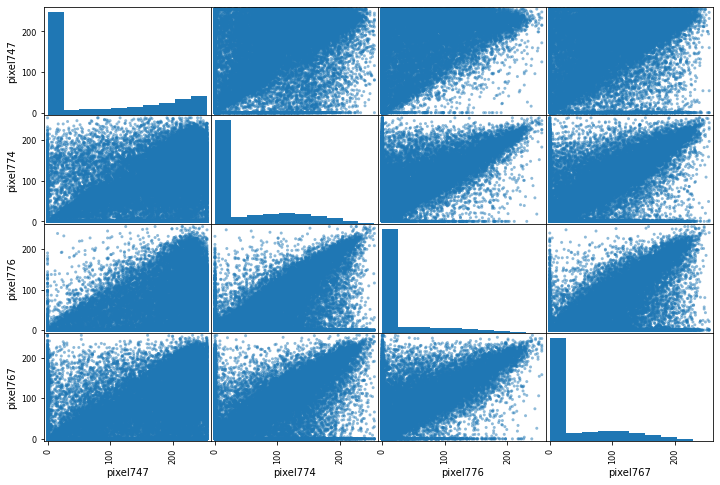

In [33]:
from pandas.plotting import scatter_matrix

attributes = ["pixel747", "pixel774", "pixel776",
              "pixel767"]
scatter_matrix(trainimg[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other

(0.0, 200.0, 0.0, 255.0)

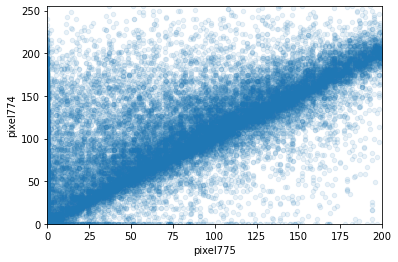

In [34]:
trainimg.plot(kind="scatter", x="pixel775", y="pixel774",
             alpha=0.1)
plt.axis([0, 200, 0, 255])

In [35]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import cv2
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [36]:
trainimg.keys()

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [37]:
X, y = trainimg["label"], trainimg["pixel2"] #label and pixel 2 of EVERY image

In [38]:
X #already of type int so no need to cast :)


0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [39]:
y

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: pixel2, Length: 60000, dtype: int64

In [40]:
trainlabels = np.array(trainimg["label"])

In [41]:
trainlabels[1]

9

In [42]:
trainimages = np.array(trainimg)

trainimages.resize(70000, 28, 28)

In [43]:
trainimages[2]

array([[  6,   0,   0, 219, 224,   0,   0,   0,   0, 186, 210, 150,   0,
          0, 153, 198, 224,  76,   0,   0,   0, 170, 220,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 102,   0,   0, 215, 203,  89, 212, 209,   0,
        255, 243,  68, 213, 200,   0, 241,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0, 217,   0, 167,   0,   0, 215, 220, 146, 206,   0, 102,
        223, 220, 189, 148,   0,   0, 237, 226,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 225,   0,  66, 219, 212,  95, 208,   0,
         97, 225,   0, 126, 229, 219,  97, 161,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0, 142, 215,   0,   0,   0,   2, 202, 215, 161,   0,   0,
        148, 207, 221,   0,   0,   0,   0, 182, 223,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 206, 181,  89, 207, 206,   0, 255,
        204, 107, 225, 212,   0, 222, 180,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

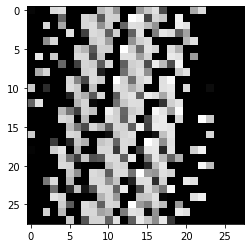

In [44]:
some_digit = trainimages[2]
plt.imshow(some_digit, cmap='gray')
plt.show()

In [45]:
batch_size = 512
train_data = np.array(pd.read_csv(r'C:\Users\ryand\Desktop\Data Mining & ML\Fashion\fashion-mnist_train.csv'))
test_data = np.array(pd.read_csv(r'C:\Users\ryand\Desktop\Data Mining & ML\Fashion\fashion-mnist_test.csv'))

In [46]:
train_data.shape

(60000, 785)

In [47]:
train_data[0]

array([  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,
         0,   0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235,
       222, 255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180,
       207, 214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0, 214, 222, 210, 213, 224, 225, 21

In [48]:
train_data[:, 0] #Gives column zero of the array [FirstRow:LastRow,Column0]

array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

In [49]:
X_train_orig = train_data[:, 1:785]
y_train_orig = train_data[:, 0]
X_test = train_data[:, 1:785]
y_test = train_data[:, 0]

In [50]:
X_train_orig = X_train_orig.astype('float32')
X_test = X_test.astype('float32')
X_train_orig /= 255
X_test /= 255

In [51]:
print(X_train_orig.shape)
print(y_train_orig.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(60000, 784)
(60000,)


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_orig, y_train_orig, test_size=0.2, random_state=12345)

In [53]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)


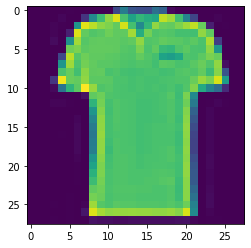

In [54]:
plt.imshow(X_train[12, :].reshape((28, 28)))

In [55]:
some_item = X_train[12]

In [56]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [57]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

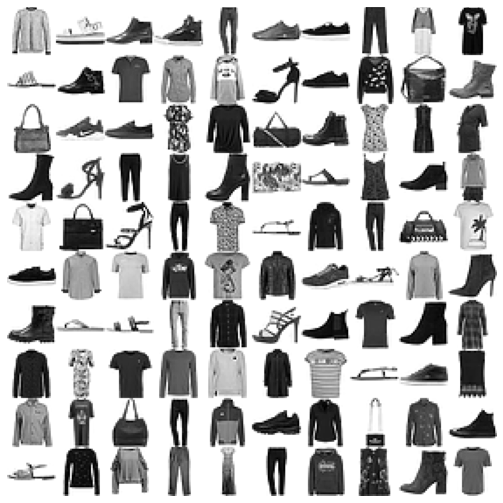

In [58]:
plt.figure(figsize=(9,9))
example_images = X_train[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

In [59]:
X_train[0].shape

(784,)

In [60]:
from tabulate import tabulate

countZero = 0
countOne = 0
countTwo = 0
countThree = 0
countFour = 0
countFive = 0
countSix = 0
countSeven = 0
countEight = 0
countNine = 0


for i in y_train:
    if i == 0:
        countZero += 1
    elif i == 1:
        countOne += 1
    elif i == 2:
        countTwo += 1
    elif i == 3:
        countThree += 1
    elif i == 4:
        countFour += 1
    elif i == 5:
        countFive += 1
    elif i == 6:
        countSix += 1
    elif i == 7:
        countSeven += 1
    elif i == 8:
        countEight += 1
    elif i == 9:
        countNine += 1
        
print(tabulate([['Zero', countZero],['One', countOne],['Two', countTwo],['Three', countThree],['Four', countFour],['Five', countFive],['Six', countSix],['Seven', countSeven],['Eight', countEight],['Nine', countNine]]))

-----  ----
Zero   4825
One    4823
Two    4813
Three  4783
Four   4807
Five   4784
Six    4801
Seven  4787
Eight  4782
Nine   4795
-----  ----


There's 6k of each in y_train_orig

# Normalise the data

Divide by 255 to make it between 0 and 1

In [61]:
x_train = X_train.astype('float') / 255
x_test = X_test.astype('float') / 255

In [62]:
x_train[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.53787014e-05, 1.53787014e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.26066907e-03,
       7.07420239e-04, 1.92233756e-03, 2.21453297e-03, 1.67627837e-03,
       1.30718958e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.53787014e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.99846218e-04, 8.45828536e-04, 3.47558634e-03,
       3.13725495e-03, 2.49134957e-03, 2.52210697e-03, 3.24490585e-03,
       3.81391773e-03, 1.53787010e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.53787014e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

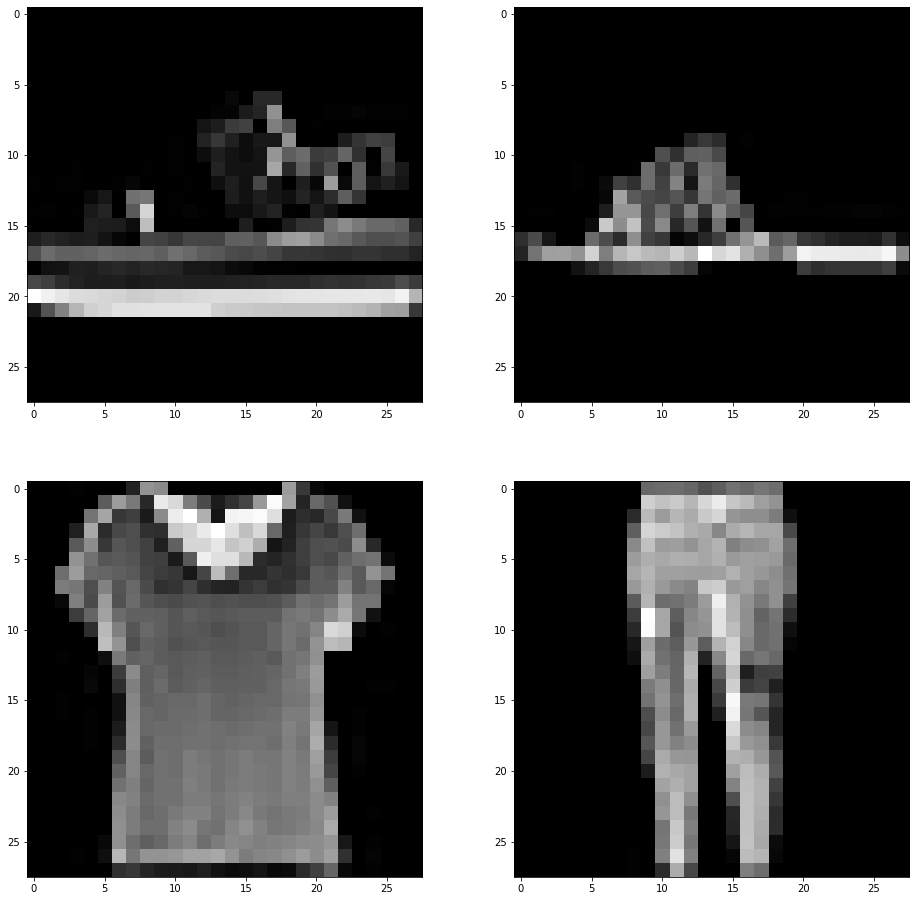

In [63]:
f, axarr = plt.subplots(2,2,figsize=(16, 16))

axarr[0,0].imshow(x_train[1].reshape(28, 28),cmap='gist_gray')
axarr[0,1].imshow(x_train[10].reshape(28, 28),cmap='gist_gray')
axarr[1,0].imshow(x_train[100].reshape(28, 28),cmap='gist_gray')
axarr[1,1].imshow(x_train[1000].reshape(28, 28),cmap='gist_gray')

# Binary Classifier

Returns true or false for whether an image is a zero or not, here a zero is a tshirt/top

In [64]:
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

print(len(y_train_0)) #48000 booleans
print(len(y_test_0)) #12000 booleans

48000
12000


# Stochastic Gradient Descent (SGD)

An estimator that implements regularised linear models with SGD Learning. The gradident of the loss is estimated with each sample at a time and the model is updated along the way with a decreasing strength schedule (learning rate). This is an iterative method.

In [65]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_0) #Fit linear model with SGD

SGDClassifier(random_state=42)

In [66]:
sgd_clf.predict([some_item]) #The classifier guesses that this image represents a 0 (True)

array([ True])

# Performance Measures

Measuring accuracy using Cross-Validation.

In [67]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_0, cv=3, scoring="accuracy")

array([0.9565   , 0.9604375, 0.9549375])

cv=3 means 3-fold cross validation. The training set is split into 3 smaller sets, and then a model is trained using 2 of the 3 folds as training data, and then the resulting model is validated on the remaining fold to compute a perfromance measure such as accuracy.

In [68]:
from sklearn.base import BaseEstimator
class Never0Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

Lets check the accuracy

In [69]:
never_0_clf = Never0Classifier()
cross_val_score(never_0_clf, X_train, y_train_0, cv=3, scoring="accuracy")

array([0.9003125, 0.9005625, 0.8975625])

High accuracy because ony 10% of the images are tshirts (0), so if you always guess that an image is not a tshirt, you would be correct 90% of the time.

For this reason, accuracy is generally not the preferred performance measure for classifiers

If we compare this accuracy with the accuracy of the SGD, we can look and say that its actually maybe only 50% accurate when predicting a 0.

# Confusion Matrix

Evaluates the accuracy of a classification. 

A confusion matrix C is such that Ci,j is equal to the number of observations known to be in group i and predicted to be in group j.

So, in binary classification, the count of:
    True negatives is C0,0 |
    False negatives is C1,0 |
    True postivies is C1,1 |
    False postivies is C0,1 

### True Postive = Correctly predicted that it was infact a shoe
### True Negative = Correctly predicted that it wasn't a tshirt
### False Positive = Incorrectly predicted that it was a hat, when it was actually a sock
### False Negative = Incorrectly predicted that it wasn't a jacket, when it was actually a jacket

In [70]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3)

In [71]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_0, y_train_pred)

array([[42550,   625],
       [ 1425,  3400]], dtype=int64)

In [72]:
y_train_perfect_predictions = y_train_0 #Pretend we reached perfection
confusion_matrix(y_train_0, y_train_perfect_predictions)

array([[43175,     0],
       [    0,  4825]], dtype=int64)

We can see that TN C0,0 == 43175, and TP C1,1 == 4825, which is a perfect prediction because there are 4825 tshirts in the dataset, and 43175 items of clothing that arent tshirts

# Specificity

TN / (TN + FP) How sensitive is the classifier to the negative cases? - A highly specific test for cancer: if "YES" then you can be sure it's "YES". Closer to 1 means less false positives. 100% Specificity misses some true positives but in return provides no false positives.

In [73]:
42550 / (42550 + 625)

0.9855240301100173

# Precision and Recall

Recall is intuitevely the ability of the classifier to find all the positive samples.

The best value is 1, and the worst value is 0.

## precision = TP / (TP+FP) 

In [74]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_0, y_train_pred)

0.84472049689441

In [75]:
4825 / (4825 + 0) #Perfect Precision

1.0

In [76]:
#If we use the original though...

3400 / (3400 + 625) #0.84 precision (84%)

0.84472049689441

## recall = TP / (TP+FN) 

Similar to sensitivity (how sensitive is our classifier to the true cases? closer to 1 when theres no false negatives) with 100% sensitivity you catch all cases that could be true, so there will be more false postitives

In [77]:
recall_score(y_train_0, y_train_pred)

0.7046632124352331

In [78]:
3400 / (3400 + 1425)

0.7046632124352331

F1 = 2 / ((1 / precision) + (1 / recall)) = 2 x ((precision x recall) / (precision + recall)) = TP / (TP + ((FN + FP) / 2))

In [79]:
from sklearn.metrics import f1_score

f1_score(y_train_0, y_train_pred)

0.768361581920904

In [80]:
3400 / (3400 + ((1425 + 625) / 2))

0.768361581920904

# Precision/Recall Trade-off

In [81]:
y_scores = sgd_clf.decision_function([some_item])
y_scores

array([4.55603073])

In [82]:
threshold = 0
y_some_item_pred = (y_scores > threshold)

In [83]:
y_some_item_pred

array([ True])

In [84]:
threshold = 8000
y_some_item_pred = (y_scores > threshold)
y_some_item_pred

array([False])

In [85]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3, method="decision_function")

In [86]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

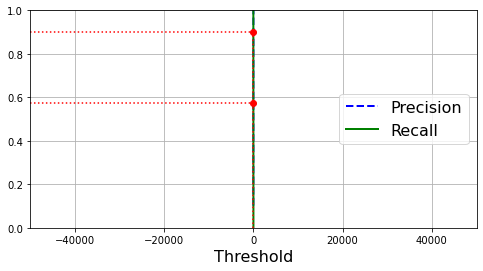

In [87]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])
    
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             
plt.show()

In [88]:
(y_train_pred == (y_scores > 0)).all()

True

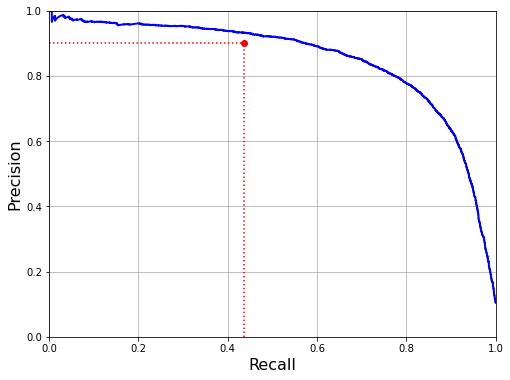

In [89]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

In [90]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [91]:
threshold_90_precision

0.7188739364909411

In [92]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [93]:
precision_score(y_train_0, y_train_pred_90)

0.9

In [94]:
recall_score(y_train_0, y_train_pred_90)

0.5745077720207253

# The ROC curves

In [95]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

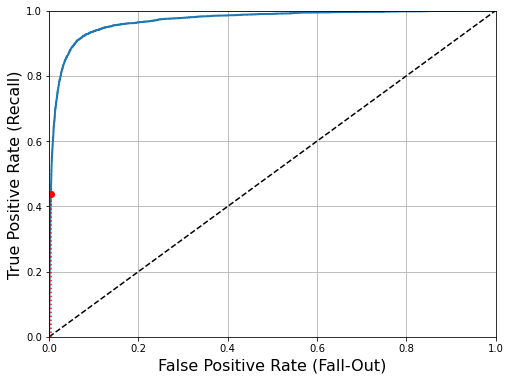

In [96]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [97]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_0, y_scores)

0.9705771102663878

In [98]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3,
                                    method="predict_proba")

In [99]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_0, y_scores_forest)

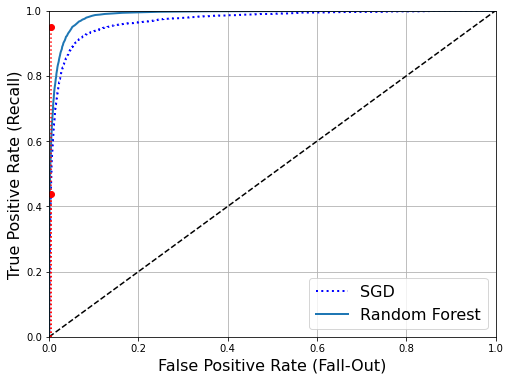

In [100]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [101]:
roc_auc_score(y_train_0, y_scores_forest)

0.9874437435308168

In [102]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3)
precision_score(y_train_0, y_train_pred_forest)

0.8659722222222223

In [103]:
recall_score(y_train_0, y_train_pred_forest)

0.7753367875647669

# Multinominal Naive Bayes

In [104]:
import numpy as np

rng = np.random.RandomState(1)

X = X_train
Y = y_train_0

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, Y)
MultinomialNB()
MultinominalPredictions = clf.predict(X[:48000])

In [105]:
from tabulate import tabulate

countFalse = 0
countTrue = 0

for i in MultinominalPredictions:
    if i == False:
        countFalse += 1
    elif i == True:
        countTrue += 1
        
print(tabulate([['False', countFalse],['True', countTrue]]))

-----  -----
False  31596
True   16404
-----  -----


In [106]:
from sklearn.metrics import accuracy_score
y_pred = MultinominalPredictions
y_true = y_train_0
print(accuracy_score(y_true, y_pred))

print(accuracy_score(y_true, y_pred, normalize=False))


0.7436875
35697


# Complement Naive Bayes

In [107]:
import numpy as np

rng = np.random.RandomState(1)

X = X_train
Y = y_train_0

from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X, Y)
ComplementNB()
ComplementPredictions = clf.predict(X[:48000])

In [108]:
from tabulate import tabulate

countFalse = 0
countTrue = 0

for i in ComplementPredictions:
    if i == False:
        countFalse += 1
    elif i == True:
        countTrue += 1
        
print(tabulate([['False', countFalse],['True', countTrue]]))

-----  -----
False  31421
True   16579
-----  -----


In [109]:
from sklearn.metrics import accuracy_score
y_pred = ComplementPredictions
y_true = y_train_0
print(accuracy_score(y_true, y_pred))

print(accuracy_score(y_true, y_pred, normalize=False))


0.7405833333333334
35548


# Bernoulli Naive Bayes

In [110]:
import numpy as np

rng = np.random.RandomState(1)

X = X_train
Y = y_train_0

from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, Y)
BernoulliNB()
BernoulliPredictions = clf.predict(X[:48000])

In [111]:
from tabulate import tabulate

countFalse = 0
countTrue = 0

for i in BernoulliPredictions:
    if i == False:
        countFalse += 1
    elif i == True:
        countTrue += 1
        
print(tabulate([['False', countFalse],['True', countTrue]]))

-----  -----
False  30805
True   17195
-----  -----


In [112]:
from sklearn.metrics import accuracy_score
y_pred = BernoulliPredictions
y_true = y_train_0
print(accuracy_score(y_true, y_pred))

print(accuracy_score(y_true, y_pred, normalize=False))


0.7324583333333333
35158


# Categorical Naive Bayes

In [113]:
import numpy as np

rng = np.random.RandomState(1)

X = X_train
Y = y_train_0

from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X, Y)
CategoricalNB()
CategoricalPredictions = clf.predict(X[:48000])

In [114]:
from tabulate import tabulate

countFalse = 0
countTrue = 0

for i in CategoricalPredictions:
    if i == False:
        countFalse += 1
    elif i == True:
        countTrue += 1
        
print(tabulate([['False', countFalse],['True', countTrue]]))

-----  -----
False  37743
True   10257
-----  -----


In [115]:
from sklearn.metrics import accuracy_score
y_pred = CategoricalPredictions
y_true = y_train_0
print(accuracy_score(y_true, y_pred))

print(accuracy_score(y_true, y_pred, normalize=False))

accuracy = accuracy_score(y_true, y_pred)


0.806625
38718


81% accuracy

In [116]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[35818,  7357],
       [ 1925,  2900]], dtype=int64)

{C0,0} 35818 true negatives. {C0,1} 7357 false positives. {C1,0} 1925 false negatives. {C1,1} 2900 true positives. Face value it seems like an okay performance, it doesn't shy away from predicting true cases, but also gets the majority of true negatives. The false positives are quite high which isn't good, but the false negatives are relatively low in the grand scheme of things.

## Precision

PRECISION = TP / (TP + FP)

In [117]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_true, y_pred)

0.2827337428097884

## Recall

RECALL = TP / (TP+FN) 

In [119]:
recall_score(y_true, y_pred)

0.6010362694300518

F1 = 2 / ((1 / precision) + (1 / recall)) = 2 x ((precision x recall) / (precision + recall)) = TP / (TP + ((FN + FP) / 2))

Needed when you want a balance between Precision and Recall

In [121]:
from sklearn.metrics import f1_score

f1_score(y_true, y_pred)

0.3845643813817796

# Precision/Recall Trade-off

In [123]:
y_scores = accuracy
y_scores

0.806625

In [124]:
threshold = 0
y_some_item_pred = (y_scores > threshold)

In [125]:
y_some_item_pred

True

In [126]:
threshold = 8000
y_some_item_pred = (y_scores > threshold)
y_some_item_pred

False

In [127]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3, method="decision_function")

# The ROC curves

In [128]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

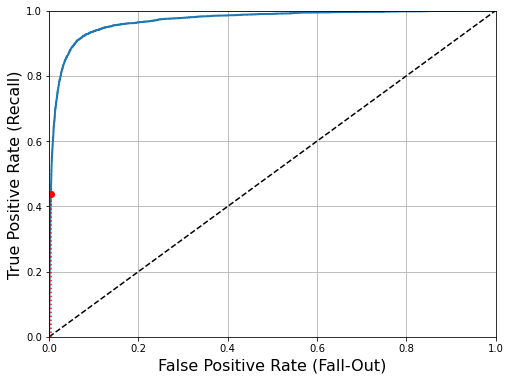

In [129]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [130]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_0, y_scores)

0.9705771102663878

In [131]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3,
                                    method="predict_proba")

In [132]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_0, y_scores_forest)

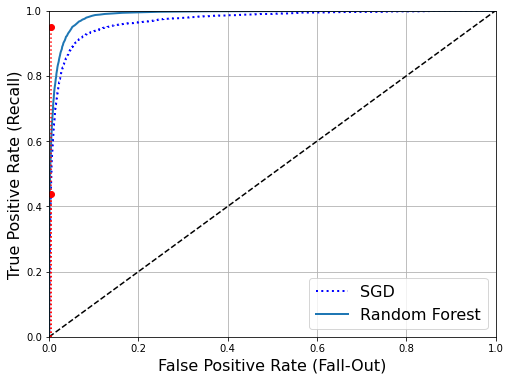

In [133]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [134]:
roc_auc_score(y_train_0, y_scores_forest)

0.9874437435308168

In [135]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3)
precision_score(y_train_0, y_train_pred_forest)

0.8659722222222223

In [136]:
recall_score(y_train_0, y_train_pred_forest)

0.7753367875647669

# Gaussian Naive Bayes

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train_0).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 12000 points : 10769


# Analysing the most correlating features/attributes of the data set

In [138]:
trainimg

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0        30        43   
3           0  ...         3         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
59995       0  ...         0         0         0         0         0   
59996       0  ...        73         0         0         0         0   
59997       0  ...       160       162       163       135        94   
59998       0  ...         0         0         0         0         0   
59999       0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             1         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
59995         0         0         0         0         0  
59996         0         0         0         0         0  
59997         0         0         0         0         0  
59998         0         0         0         0         0  
59999         0         0         0         0         0  

[60000 rows x 785 columns]

In [139]:
corr_matrix = trainimg.corr()

In [140]:
corr_matrix["label"].sort_values(ascending=False).head(11)

label       1.000000
pixel418    0.664797
pixel446    0.664342
pixel390    0.659438
pixel474    0.656930
pixel445    0.645482
pixel362    0.645247
pixel417    0.643718
pixel389    0.640325
pixel473    0.638751
pixel502    0.631853
Name: label, dtype: float64

Pixels highly correlating to all images are pixel418, 446 and 390

In [141]:
DataSet1 = trainimg.loc[:, ["pixel418", "pixel446"]]

In [142]:
DataSet1

pixel418  pixel446
0           254       234
1           155       164
2             0         0
3             0         0
4             0         0
...         ...       ...
59995       234       227
59996         0         0
59997         0         0
59998       229       219
59999       208       198

[60000 rows x 2 columns]

In [143]:
DataSet2 = trainimg.loc[:, ["pixel418", "pixel446", "pixel390", "pixel474", "pixel445"]]

In [144]:
DataSet3 = trainimg.loc[:, ["pixel418", "pixel446", "pixel390", "pixel474", "pixel445", "pixel362", "pixel417", "pixel389", "pixel473", "pixel502"]]

# DATA SET 1

In [145]:
trainingD1 = np.array(DataSet1)
trainingD1

array([[254, 234],
       [155, 164],
       [  0,   0],
       ...,
       [  0,   0],
       [229, 219],
       [208, 198]], dtype=int64)

In [146]:
count = 0
for x in y_train_0:
    if x == True:
        count += 1
        
count

4825

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainingD1, y_train_orig, test_size=0.2, random_state=12345)

^ We split the data up into training set with images and labels, and testing set with images and labels. This changes the number of zero counts for some reason?

In [148]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(48000, 2)
(48000,)
(12000, 2)
(12000,)


^ Check that data is equal length

In [149]:
y_train_0 = (y_train == 0) # True for all 0s, False for all other digits
y_test_0 = (y_test == 0)

print(len(y_train_0))
print(len(y_test_0))

48000
12000


^ Make a set of labels that are booleans, where all 0 labels are turned into True bools, and False otherwise.

In [150]:
count = 0
for x in y_train_0:
    if x == True:
        count += 1
        
count

4825

^ 4825 T-Shirts (0) in the data set

In [151]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_0) #Fit linear model with SGD

SGDClassifier(random_state=42)

In [152]:
y_train_0[:13]

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True])

In [153]:
X_train[12]

array([0, 0], dtype=int64)

In [154]:
some_item2 = X_train[12]

In [155]:
sgd_clf.predict([some_item2]) #The classifier guesses that this image doesnt represents a 0 (False), but it is a 0

array([False])

In [156]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_0, cv=3, scoring="accuracy")

array([0.8995   , 0.8995   , 0.8823125])

It is predicting that every image is not class 0, so its correct 90% of the time.
On the base dataset we got array([0.9565   , 0.9604375, 0.9549375]) so we are no worse off with 2 features.

In [157]:
from sklearn.base import BaseEstimator
class Never0Classifier(BaseEstimator):
    def fit(self, X_train, y=None):
        pass
    def predict(self, X_train):
        return np.zeros((len(X_train), 1), dtype=bool)

In [158]:
never_0_clf = Never0Classifier()
cross_val_score(never_0_clf, X_train, y_train_0, cv=3, scoring="accuracy")

array([0.9003125, 0.9005625, 0.8975625])

In [159]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3)

In [160]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [161]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_0, y_train_pred)

array([[42870,   305],
       [ 4794,    31]], dtype=int64)

{C0,0} 42870 true negatives. {C0,1} 305 false positives. {C1,0} 4794 false negatives. {C1,1} 31 true positives. Not very accurate, seems to be overly predicting false cases, since there is a high number of false negatives and a low number of true & false positives.

In [162]:
y_train_perfect_predictions = y_train_0 #Pretend we reached perfection
confusion_matrix(y_train_0, y_train_perfect_predictions)

array([[43175,     0],
       [    0,  4825]], dtype=int64)

there should be {C0,0} 43199 true negatives. {C0,1} 0 False Positives. {C1,0} 0 False Negatives. {C1,1} 4801 True Positives.

# Actual y_train counts

In [163]:
from tabulate import tabulate

countZero = 0
countOne = 0
countTwo = 0
countThree = 0
countFour = 0
countFive = 0
countSix = 0
countSeven = 0
countEight = 0
countNine = 0

for i in y_train:
    if i == 0:
        countZero += 1
    elif i == 1:
        countOne += 1
    elif i == 2:
        countTwo += 1
    elif i == 3:
        countThree += 1
    elif i == 4:
        countFour += 1
    elif i == 5:
        countFive += 1
    elif i == 6:
        countSix += 1
    elif i == 7:
        countSeven += 1
    elif i == 8:
        countEight += 1
    elif i == 9:
        countNine += 1
        
print(tabulate([['Zero', countZero],['One', countOne],['Two', countTwo],['Three', countThree],['Four', countFour],['Five', countFive],['Six', countSix],['Seven', countSeven],['Eight', countEight],['Nine', countNine]], headers=['Number', 'Count']))

Number      Count
--------  -------
Zero         4825
One          4823
Two          4813
Three        4783
Four         4807
Five         4784
Six          4801
Seven        4787
Eight        4782
Nine         4795


^ This does actually total to 48k but the label set is uneven

# Multinominal Naive Bayes for D1

In [164]:
import numpy as np

rng = np.random.RandomState(1)

X = X_train
Y = y_train_0

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, Y)
MultinomialNB()
MultinominalPredictions = clf.predict(X[:48000])

In [165]:
from tabulate import tabulate

countFalse = 0
countTrue = 0

for i in MultinominalPredictions:
    if i == False:
        countFalse += 1
    elif i == True:
        countTrue += 1
        
print(tabulate([['False', countFalse],['True', countTrue]]))

-----  -----
False  46445
True    1555
-----  -----


In [166]:
from sklearn.metrics import accuracy_score
y_pred = MultinominalPredictions
y_true = y_train_0
print(accuracy_score(y_true, y_pred))

print(accuracy_score(y_true, y_pred, normalize=False))

0.8696666666666667
41744


# Complement Naive Bayes for D1

In [167]:
import numpy as np

rng = np.random.RandomState(1)

X = X_train
Y = y_train_0

from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X, Y)
ComplementNB()
ComplementPredictions = clf.predict(X[:48000])

In [168]:
from tabulate import tabulate

countFalse = 0
countTrue = 0

for i in ComplementPredictions:
    if i == False:
        countFalse += 1
    elif i == True:
        countTrue += 1
        
print(tabulate([['False', countFalse],['True', countTrue]]))

-----  -----
False  42361
True    5639
-----  -----


In [169]:
from sklearn.metrics import accuracy_score
y_pred = ComplementPredictions
y_true = y_train_0
print(accuracy_score(y_true, y_pred))

print(accuracy_score(y_true, y_pred, normalize=False))

0.7936666666666666
38096


# Bernoulli Naive Bayes for D1

In [170]:
import numpy as np

rng = np.random.RandomState(1)

X = X_train
Y = y_train_0

from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, Y)
BernoulliNB()
BernoulliPredictions = clf.predict(X[:48000])

In [171]:
BernoulliPredictions

array([False, False, False, ..., False, False, False])

In [172]:
from tabulate import tabulate

countFalse = 0
countTrue = 0

for i in BernoulliPredictions:
    if i == False:
        countFalse += 1
    elif i == True:
        countTrue += 1
        
print(tabulate([['False', countFalse],['True', countTrue]]))

-----  -----
False  48000
True       0
-----  -----


In [173]:
from sklearn.metrics import accuracy_score
y_pred = BernoulliPredictions
y_true = y_train_0
print(accuracy_score(y_true, y_pred))

print(accuracy_score(y_true, y_pred, normalize=False))


0.8994791666666667
43175


# Categorical Naive Bayes for D1

In [174]:
import numpy as np

rng = np.random.RandomState(1)

X = X_train
Y = y_train_0



from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X, Y)
CategoricalNB()
predictions = clf.predict(X[:48000])

In [175]:
from tabulate import tabulate

countFalse = 0
countTrue = 0

for i in predictions:
    if i == False:
        countFalse += 1
    elif i == True:
        countTrue += 1
        
print(tabulate([['False', countFalse],['True', countTrue]]))

-----  -----
False  47901
True      99
-----  -----


The original data set with Categorical Naive Bayes returned False 37743, True 10257, so this time around there are more predictions of the positive sort, and less of the negative sort, though a marginal increase and decrease respectively.

In [176]:
from sklearn.metrics import accuracy_score
y_pred = predictions
y_true = y_train_0
print(accuracy_score(y_true, y_pred))

print(accuracy_score(y_true, y_pred, normalize=False))

accuracy = accuracy_score(y_true, y_pred)

0.8995416666666667
43178


The original dataset scored 81% accuracy, and this time around with 2 features it scored 90%. A marginal increase but more accurate nevertheless.

In [177]:
y_true.shape

(48000,)

In [178]:
y_pred.shape

(48000,)

Categorical had the best accuracy so I will record all the major metrices for it.

In [179]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[43127,    48],
       [ 4774,    51]], dtype=int64)

Original dataset: {C0,0} 35818 true negatives. {C0,1} 7357 false positives. {C1,0} 1925 false negatives. {C1,1} 2900 true positives.

DataSet1: {C0,0} 43127 true negatives. {C0,1} 48 False Positives. {C1,0} 4774 False Negatives. {C1,1} 51 True Positives.

True negatives are up significantly, and false positives are down which is great. False negatives are up significantly though, and true positives are down really low. Prediction seems to be based on prediciting false for the majority of cases. With only two features, the algorithm is playing it safe.

## Precision for D1

PRECISION = TP / (TP + FP)

In [180]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_true, y_pred)

0.5151515151515151

Original dataset had 28% precision. This time around with 2 features, there is a 52% precision.

## Recall for D1

RECALL = TP / (TP+FN) 

In [182]:
recall_score(y_true, y_pred)

0.010569948186528497

Original dataset had 0.60 recall, with two features the recall is 0.01, which is down a lot.

F1 = 2 / ((1 / precision) + (1 / recall)) = 2 x ((precision x recall) / (precision + recall)) = TP / (TP + ((FN + FP) / 2))

Needed when you want a balance between Precision and Recall

In [184]:
from sklearn.metrics import f1_score

f1_score(y_true, y_pred)

0.020714865962632008

Original data set had 0.38 F score. With two features the score has dropped to 0.02.

# Precision/Recall Trade-off D1

In [186]:
y_scores = accuracy
y_scores

0.8995416666666667

Accuracy with the original dataset was 0.81. The accuracy has increased with two features to 0.9

In [187]:
threshold = 0
y_some_item_pred = (y_scores > threshold)

In [188]:
y_some_item_pred

True

In [189]:
threshold = 8000
y_some_item_pred = (y_scores > threshold)
y_some_item_pred

False

In [190]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3, method="decision_function")

# The ROC curves for D1

In [191]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

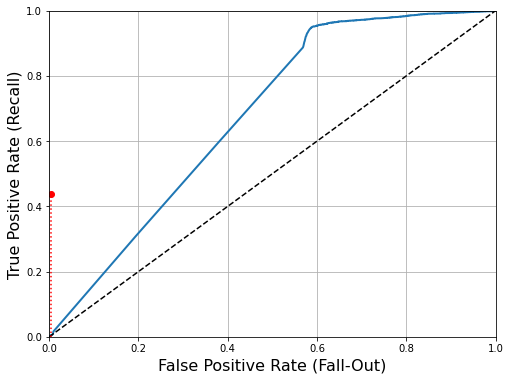

In [192]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [193]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_0, y_scores)

0.6765335629487176

In [194]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3,
                                    method="predict_proba")

In [195]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_0, y_scores_forest)

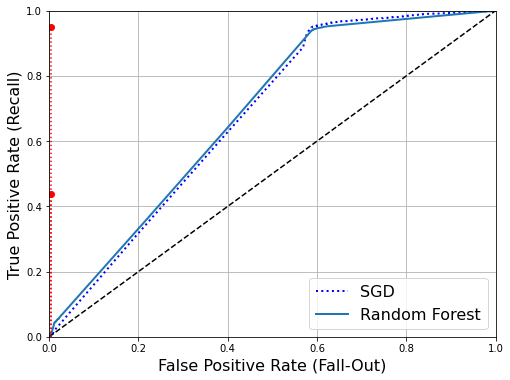

In [196]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [197]:
roc_auc_score(y_train_0, y_scores_forest)

0.6825632085349719

In [198]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3)
precision_score(y_train_0, y_train_pred_forest)

0.2565789473684211

In [199]:
recall_score(y_train_0, y_train_pred_forest)

0.008082901554404146

# Gaussian Naive Bayes for D1

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train_0).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 12000 points : 10776


# DATA SET 2

In [201]:
trainingD2 = np.array(DataSet2)
trainingD2

array([[254, 234, 148, 222, 208],
       [155, 164, 190, 118, 162],
       [  0,   0,   0,   0,   0],
       ...,
       [  0,   0,   0,   0,   1],
       [229, 219, 223, 221, 211],
       [208, 198, 200, 199, 206]], dtype=int64)

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainingD2, y_train_orig, test_size=0.2, random_state=12345)

^ We split the data up into training set with images and labels, and testing set with images and labels.

In [203]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(48000, 5)
(48000,)
(12000, 5)
(12000,)


^ Check that data is equal length

In [204]:
y_train_0 = (y_train == 0) # True for all 0s, False for all other digits
y_test_0 = (y_test == 0)

print(len(y_train_0))
print(len(y_test_0))

48000
12000


^ Make a set of labels that are booleans, where all 0 labels are turned into True bools, and False otherwise.

In [205]:
count = 0
for x in y_train_0:
    if x == True:
        count += 1
        
count

4825

^ 4801 T-Shirts (0) in the data set

In [206]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_0) #Fit linear model with SGD

SGDClassifier(random_state=42)

In [207]:
y_train_0[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

In [208]:
X_train[3]

array([196, 179, 200, 181, 209], dtype=int64)

In [209]:
some_item2 = X_train[3]

In [210]:
sgd_clf.predict([some_item2]) #The classifier guesses that this image doesnt represents a 0 (False), but it is a 0

array([False])

In [211]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_0, cv=3, scoring="accuracy")

array([0.899   , 0.8995  , 0.889625])

It is predicting that every image is not class 0, so its correct 90% of the time

In [212]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3)

In [213]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [214]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_0, y_train_pred)

array([[43007,   168],
       [ 4822,     3]], dtype=int64)

{C0,0} 43169 true negatives. {C0,1} 30 false positives. {C1,0} 4799 false negatives. {C1,1} 2 true positives.

there should be {C0,0} 43199 true negatives. {C0,1} 0 False Positives. {C1,0} 0 False Negatives. {C1,1} 4801 True Positives.

# Multinominal Naive Bayes for D2

In [215]:
import numpy as np

rng = np.random.RandomState(1)

X = X_train
Y = y_train_0

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, Y)
MultinomialNB()
MultinominalPredictions = clf.predict(X[:48000])

In [216]:
from tabulate import tabulate

countFalse = 0
countTrue = 0

for i in MultinominalPredictions:
    if i == False:
        countFalse += 1
    elif i == True:
        countTrue += 1
        
print(tabulate([['False', countFalse],['True', countTrue]]))

-----  -----
False  40263
True    7737
-----  -----


It's predicting way more True cases this time with just 3 extra features.

In [217]:
from sklearn.metrics import accuracy_score
y_pred = MultinominalPredictions
y_true = y_train_0
print(accuracy_score(y_true, y_pred))

print(accuracy_score(y_true, y_pred, normalize=False))

0.748
35904


Accuracy has gone down with more features

# Complement Naive Bayes for D2

In [218]:
import numpy as np

rng = np.random.RandomState(1)

X = X_train
Y = y_train_0

from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X, Y)
ComplementNB()
ComplementPredictions = clf.predict(X[:48000])

In [219]:
from tabulate import tabulate

countFalse = 0
countTrue = 0

for i in ComplementPredictions:
    if i == False:
        countFalse += 1
    elif i == True:
        countTrue += 1
        
print(tabulate([['False', countFalse],['True', countTrue]]))

-----  -----
False  37823
True   10177
-----  -----


In [220]:
from sklearn.metrics import accuracy_score
y_pred = ComplementPredictions
y_true = y_train_0
print(accuracy_score(y_true, y_pred))

print(accuracy_score(y_true, y_pred, normalize=False))

0.7267083333333333
34882


True cases have increased and accuracy is down with more features

# Bernoulli Naive Bayes for D2

In [221]:
import numpy as np

rng = np.random.RandomState(1)

X = X_train
Y = y_train_0

from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, Y)
BernoulliNB()
BernoulliPredictions = clf.predict(X[:48000])

In [222]:
BernoulliPredictions

array([False, False, False, ..., False, False, False])

In [223]:
from tabulate import tabulate

countFalse = 0
countTrue = 0

for i in BernoulliPredictions:
    if i == False:
        countFalse += 1
    elif i == True:
        countTrue += 1
        
print(tabulate([['False', countFalse],['True', countTrue]]))

-----  -----
False  26247
True   21753
-----  -----


Way more True predictions this time around with more features, previosuly with only 2 features there were 0 True predictions

In [224]:
from sklearn.metrics import accuracy_score
y_pred = BernoulliPredictions
y_true = y_train_0
print(accuracy_score(y_true, y_pred))

print(accuracy_score(y_true, y_pred, normalize=False))


0.5954166666666667
28580


Accuracy is down though, since it no longer goes with the safe option of predicting that there are no t-shirts at all which 
would give a 90% accuracy

# Categorical Naive Bayes for D2

In [225]:
import numpy as np

rng = np.random.RandomState(1)

X = X_train
Y = y_train_0



from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X, Y)
CategoricalNB()
predictions = clf.predict(X[:48000])

In [226]:
from tabulate import tabulate

countFalse = 0
countTrue = 0

for i in predictions:
    if i == False:
        countFalse += 1
    elif i == True:
        countTrue += 1
        
print(tabulate([['False', countFalse],['True', countTrue]]))

-----  -----
False  46196
True    1804
-----  -----


The original data set with Categorical Naive Bayes returned False 37743, True 10257. DataSet1 which has two features returned False 47901 and True 99. This time around the amount of False predictions has gone down in comparison to D1, but up in comparison to the original data set. The True predictions are also up in comparison to D1 but down in comparison to the original data set. This looks a lot more promising but there still isnt enough true predictions, as there are 4825 t-shirt images. False 46196, True 1804.

In [227]:
from sklearn.metrics import accuracy_score
y_pred = predictions
y_true = y_train_0
print(accuracy_score(y_true, y_pred))

print(accuracy_score(y_true, y_pred, normalize=False))

accuracy = accuracy_score(y_true, y_pred)

0.8969375
43053


The original dataset scored 81% accuracy, with 2 features it scored 90%. With 5 features it has scored 90% also.

In [228]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[42212,   963],
       [ 3984,   841]], dtype=int64)

Original dataset: {C0,0} 35818 true negatives. {C0,1} 7357 false positives. {C1,0} 1925 false negatives. {C1,1} 2900 true positives.

DataSet1: {C0,0} 43127 true negatives. {C0,1} 48 False Positives. {C1,0} 4774 False Negatives. {C1,1} 51 True Positives.

DataSet2: {C0,0} 42212 true negatives. {C0,1} 963 False Positives. {C1,0} 3984 False Negatives. {C1,1} 841 True Positives.

True negatives are up from the original set, but down in comparison to D1. False positives are also up in comparison to D1, however, false negatives are down and true positives are up significantly. It can be seen from this data that D2 > D1. And D2 > OG.

## Precision for D2

PRECISION = TP / (TP + FP)

In [229]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_true, y_pred)

0.4661862527716186

Original dataset had 28% precision. With 2 features, there is a 52% precision. With 5 features there is 47% precision.

## Recall for D2

RECALL = TP / (TP+FN) 

In [230]:
recall_score(y_true, y_pred)

0.17430051813471503

Original dataset had 0.60 recall, with two features the recall is 0.01, with 5 features it has increased again to 0.17

F1 = 2 / ((1 / precision) + (1 / recall)) = 2 x ((precision x recall) / (precision + recall)) = TP / (TP + ((FN + FP) / 2))

Needed when you want a balance between Precision and Recall

In [231]:
from sklearn.metrics import f1_score

f1_score(y_true, y_pred)

0.2537335948106803

Original data set had 0.38 F score. With two features the score dropped to 0.02. It has gone back up to 0.25 with 5 features.

# Precision/Recall Trade-off D2

In [232]:
y_scores = accuracy
y_scores

0.8969375

Accuracy with the original dataset was 0.81. The accuracy increased with two features to 0.9 and is also 0.9 with 5 features.

In [233]:
threshold = 0
y_some_item_pred = (y_scores > threshold)

In [234]:
y_some_item_pred

True

In [235]:
threshold = 8000
y_some_item_pred = (y_scores > threshold)
y_some_item_pred

False

In [236]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3, method="decision_function")

# The ROC curves for D2

In [237]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

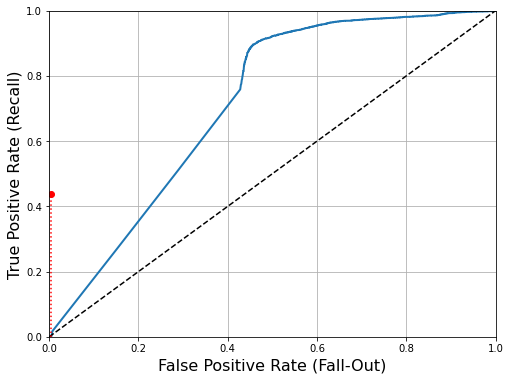

In [238]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [239]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_0, y_scores)

0.7125136800165611

In [240]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3,
                                    method="predict_proba")

In [241]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_0, y_scores_forest)

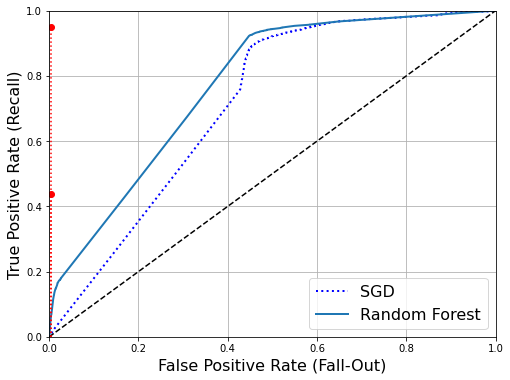

In [242]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [243]:
roc_auc_score(y_train_0, y_scores_forest)

0.771271918418534

In [244]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3)
precision_score(y_train_0, y_train_pred_forest)

0.5803310613437196

In [245]:
recall_score(y_train_0, y_train_pred_forest)

0.12352331606217616

# Gaussian Naive Bayes for D2

In [246]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train_0).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 12000 points : 10775


# DATA SET 3

In [247]:
trainingD3 = np.array(DataSet3)
trainingD3

array([[254, 234, 148, ..., 233, 209, 212],
       [155, 164, 190, ..., 127, 156,  97],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   2,   0,   0],
       [229, 219, 223, ..., 210, 206, 218],
       [208, 198, 200, ..., 203, 203, 223]], dtype=int64)

In [248]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainingD3, y_train_orig, test_size=0.2, random_state=12345)

^ We split the data up into training set with images and labels, and testing set with images and labels.

In [249]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(48000, 10)
(48000,)
(12000, 10)
(12000,)


^ Check that data is equal length

In [250]:
y_train_0 = (y_train == 0) # True for all 0s, False for all other digits
y_test_0 = (y_test == 0)

print(len(y_train_0))
print(len(y_test_0))

48000
12000


^ Make a set of labels that are booleans, where all 0 labels are turned into True bools, and False otherwise.

In [251]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_0) #Fit linear model with SGD

SGDClassifier(random_state=42)

In [252]:
X_train[3]

array([196, 179, 200, 181, 209, 196, 218, 196, 201, 187], dtype=int64)

In [253]:
some_item2 = X_train[3]

In [254]:
sgd_clf.predict([some_item2]) #The classifier guesses that this image doesnt represents a 0 (False), but it is a 0

array([False])

In [255]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_0, cv=3, scoring="accuracy")

array([0.899    , 0.8895625, 0.887375 ])

It is predicting that every image is not class 0, so its correct 90% of the time

In [256]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3)

In [257]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [258]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_0, y_train_pred)

array([[42530,   645],
       [ 4540,   285]], dtype=int64)

D2 had {C0,0} 43169 true negatives. {C0,1} 30 false positives. {C1,0} 4799 false negatives. {C1,1} 2 true positives.
D3 has {C0,0} 43173 true negatives. {C0,1} 26 false positives. {C1,0} 4783 false negatives. {C1,1} 18 true positives.
Small change.

there should be {C0,0} 43199 true negatives. {C0,1} 0 False Positives. {C1,0} 0 False Negatives. {C1,1} 4801 True Positives.

# Multinominal Naive Bayes for D3

In [259]:
import numpy as np

rng = np.random.RandomState(1)

X = X_train
Y = y_train_0

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, Y)
MultinomialNB()
MultinominalPredictions = clf.predict(X[:48000])

In [260]:
from tabulate import tabulate

countFalse = 0
countTrue = 0

for i in MultinominalPredictions:
    if i == False:
        countFalse += 1
    elif i == True:
        countTrue += 1
        
print(tabulate([['False', countFalse],['True', countTrue]]))

-----  -----
False  41099
True    6901
-----  -----


D2 had 40225 False predictions, and 7775 True predictions.
D3 has 41223 False predictions, and 6777 True predictions.

It's predicting less True cases this time in comparison to 5 features.

In [261]:
from sklearn.metrics import accuracy_score
y_pred = MultinominalPredictions
y_true = y_train_0
print(accuracy_score(y_true, y_pred))

print(accuracy_score(y_true, y_pred, normalize=False))

0.773875
37146


74% accuracy with 3 features. 77% accuracy with 10 features. So accuracy has increased.

Accuracy was down with 5 features compared to 2, but is back up with 10 features in comparison to 5.

# Complement Naive Bayes for D3

In [262]:
import numpy as np

rng = np.random.RandomState(1)

X = X_train
Y = y_train_0

from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X, Y)
ComplementNB()
ComplementPredictions = clf.predict(X[:48000])

In [263]:
from tabulate import tabulate

countFalse = 0
countTrue = 0

for i in ComplementPredictions:
    if i == False:
        countFalse += 1
    elif i == True:
        countTrue += 1
        
print(tabulate([['False', countFalse],['True', countTrue]]))

-----  -----
False  39355
True    8645
-----  -----


In [264]:
from sklearn.metrics import accuracy_score
y_pred = ComplementPredictions
y_true = y_train_0
print(accuracy_score(y_true, y_pred))

print(accuracy_score(y_true, y_pred, normalize=False))

0.7848333333333334
37672


73% accuracy with 5 features. 79% with 10 features. A good increase again.

# Bernoulli Naive Bayes for D3

In [265]:
import numpy as np

rng = np.random.RandomState(1)

X = X_train
Y = y_train_0

from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, Y)
BernoulliNB()
BernoulliPredictions = clf.predict(X[:48000])

In [266]:
BernoulliPredictions

array([False, False, False, ..., False, False, False])

In [267]:
from tabulate import tabulate

countFalse = 0
countTrue = 0

for i in BernoulliPredictions:
    if i == False:
        countFalse += 1
    elif i == True:
        countTrue += 1
        
print(tabulate([['False', countFalse],['True', countTrue]]))

-----  -----
False  26166
True   21834
-----  -----


D2 had 26361 False predictions, and 21639 True predictions. There was only a slight change with D3, 26267 True predictions, 21733 False predictions.

In [268]:
from sklearn.metrics import accuracy_score
y_pred = BernoulliPredictions
y_true = y_train_0
print(accuracy_score(y_true, y_pred))

print(accuracy_score(y_true, y_pred, normalize=False))


0.6001041666666667
28805


2 features gave a 90% accuracy, 5 features gave a 60% accuracy, 10 features has given a 60% accuracy too, however it was decimally more.

# Categorical Naive Bayes for D3

In [269]:
import numpy as np

rng = np.random.RandomState(1)

X = X_train
Y = y_train_0



from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X, Y)
CategoricalNB()
predictions = clf.predict(X[:48000])

In [270]:
from tabulate import tabulate

countFalse = 0
countTrue = 0

for i in predictions:
    if i == False:
        countFalse += 1
    elif i == True:
        countTrue += 1
        
print(tabulate([['False', countFalse],['True', countTrue]]))

-----  -----
False  24531
True   23469
-----  -----


The original data set with Categorical Naive Bayes returned False 37743, True 10257. DataSet1 which has two features returned False 47901 and True 99. D2 had False 46196, True 1804. This time around there is way more True predictions that ever, with 24531 False, and 23469 True. Not a good sign, it looks as though D2 is going to be the best DataSet out of all of them.

In [271]:
from sklearn.metrics import accuracy_score
y_pred = predictions
y_true = y_train_0
print(accuracy_score(y_true, y_pred))

print(accuracy_score(y_true, y_pred, normalize=False))

accuracy = accuracy_score(y_true, y_pred)

0.5956666666666667
28592


The original dataset scored 81% accuracy, with 2 features it scored 90%. With 5 features it scored 90% also. With 10 features it has scored 0.6 which is the worst of them all.

Even more True predictions this time which leads me to predict that there will be more True Positives than there were with 5 features, but even more false positives too. We would hope for less false positives but this isn't guaranteed.

In [272]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[24149, 19026],
       [  382,  4443]], dtype=int64)

Original dataset: {C0,0} 35818 true negatives. {C0,1} 7357 false positives. {C1,0} 1925 false negatives. {C1,1} 2900 true positives.

DataSet1: {C0,0} 43127 true negatives. {C0,1} 48 False Positives. {C1,0} 4774 False Negatives. {C1,1} 51 True Positives.

DataSet2: {C0,0} 42212 true negatives. {C0,1} 963 False Positives. {C1,0} 3984 False Negatives. {C1,1} 841 True Positives.

DataSet3: {C0,0} 24149 true negatives. {C0,1} 19026 False Positives. {C1,0} 382 False Negatives. {C1,1} 4443 True Positives.

So true negatives are down, but clearly down way too much. False positives are the highest they've ever been which is terrible. Flase Negatives are down which is an improvement. True positives is the closest to the true positive base there is, which is amazing. So with 10 features, it can catch almost all the true positives, however it is over predicting True. Maybe with an extra data set that has 6, 7, or 8 features may be optimal.

## Precision for D3

PRECISION = TP / (TP + FP)

In [273]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_true, y_pred)

0.18931356257190335

Original dataset had 28% precision. With 2 features, there is a 52% precision. With 5 features there is 47% precision. With 10 features there is a 19% precision which is not ideal - the worst there has been.

## Recall for D3

RECALL = TP / (TP+FN) 

In [274]:
recall_score(y_true, y_pred)

0.9208290155440414

Original dataset had 0.60 recall, with two features the recall is 0.01, with 5 features it has increased again to 0.17. With 10 features there is a 0.92 recall which is really good, this is because it is predicting way more true positives and way less false negatives, this is obviosuly leaving out the fact that its False positive score is really bad, and so is its True Negative score.

F1 = 2 / ((1 / precision) + (1 / recall)) = 2 x ((precision x recall) / (precision + recall)) = TP / (TP + ((FN + FP) / 2))

Needed when you want a balance between Precision and Recall

In [275]:
from sklearn.metrics import f1_score

f1_score(y_true, y_pred)

0.31405951791899345

Original data set had 0.38 F score. With two features the score dropped to 0.02. It went back up to 0.25 with 5 features. With 10 features it has an F score of 0.31.

# Precision/Recall Trade-off D3

In [276]:
y_scores = accuracy
y_scores

0.5956666666666667

Accuracy with the original dataset was 0.81. The accuracy increased with two features to 0.9 and is also 0.9 with 5 features. With 10 features it has an accuracy of 0.6. This is a decrease and is further showing that 10 features is not better than 5.

In [277]:
threshold = 0
y_some_item_pred = (y_scores > threshold)

In [278]:
y_some_item_pred

True

In [279]:
threshold = 8000
y_some_item_pred = (y_scores > threshold)
y_some_item_pred

False

In [280]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3, method="decision_function")

# The ROC curves for D3

In [281]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

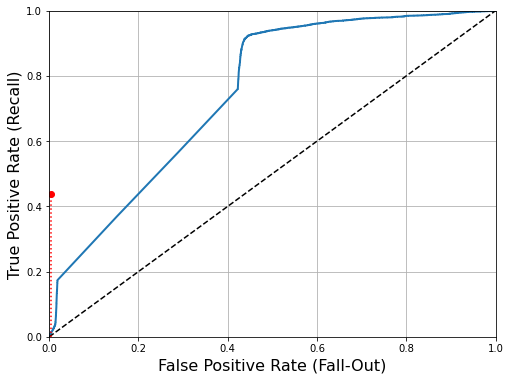

In [282]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [283]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_0, y_scores)

0.7486451488249712

In [284]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3,
                                    method="predict_proba")

In [285]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_0, y_scores_forest)

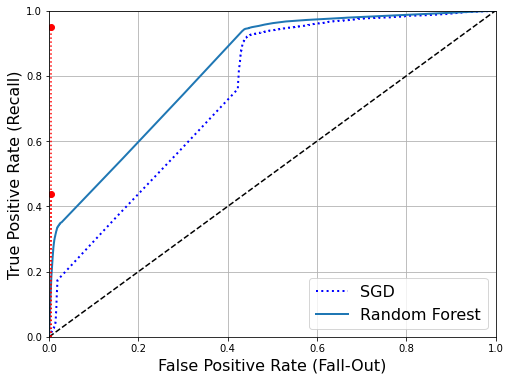

In [286]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [287]:
roc_auc_score(y_train_0, y_scores_forest)

0.8235307637611721

In [288]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3)
precision_score(y_train_0, y_train_pred_forest)

0.751753912574204

In [289]:
recall_score(y_train_0, y_train_pred_forest)

0.2887046632124352

# Gaussian Naive Bayes for D3

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train_0).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 12000 points : 10758


Clustering algorithm EM - use gaussian mixture